## Download and Import Packages

In [146]:
# !pip install pandas numpy matplotlib statsmodels pandas_datareader datetime yfinance scikit-learn PyPortfolioOpt pandas-ta

In [147]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import pandas as pd 
import numpy as np 
import datetime as dt 
import yfinance as yf 
import pandas_ta
import warnings 
warnings.filterwarnings('ignore')

## 1. Load Data

In [148]:
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
# sp500 will have 2 lists, we only need the data in the first list. Hence the [0]

sp500['Symbol']= sp500['Symbol'].str.replace('.','-')
# some ticker symbols have dots replace with "-" so that yfinance wont have problem

symbols_list = sp500['Symbol'].unique().tolist()
symbols_list # gives the unique tickers in a list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [149]:
end_date = '2024-03-01'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)
#this is to determine the start and end date for the data to be downloaded from yf

In [150]:
df = yf.download(tickers=symbols_list, 
                    start = start_date,
                    end= end_date).stack()
df
# this returns a multi-column df with Adj close and Volume as primary column,
# then there is date, and all the company tickers under the Adj close and Volume as secondary columns
# hence to make the data better to visualize and work with, we use "stack()"
# resulting  output will be date-wise, adj close and OHLC , Vol data for each security as seen below

[*********************100%%**********************]  503 of 503 completed


Adj Close       Close        High         Low        Open  \
Date                                                                          
2016-03-03 A      36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL    40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL   23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV   39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT    33.467422   38.820000   38.889999   38.090000   38.560001   
...                     ...         ...         ...         ...         ...   
2024-02-29 XYL   127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM   138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH   124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA  279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS   198.330002  198.330002  200.529999  198.190002  200.500000   

                      Volume  
Date                          
2016-03-03 A        946800.0  
           AAL     8812800.0  
           AAPL  147822800.0  
           ABBV    9283900.0  
           ABT    13516200.0  
...                      ...  
2024-02-29 XYL     1829200.0  
           YUM     2257700.0  
           ZBH     2415800.0  
           ZBRA     400900.0  
           ZTS     2849200.0  

[995328 rows x 6 columns]

In [151]:
df.index.names = ["date", "ticker"]
df.columns = df.columns.str.lower()
df
# this sets date and ticker column headers and makes all the column names in lowercase

adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  
date       ticker               
2016-03-03 A          946800.0  
           AAL       8812800.0  
           AAPL    147822800.0  
           ABBV      9283900.0  
           ABT      13516200.0  
...                        ...  
2024-02-29 XYL       1829200.0  
           YUM       2257700.0  
           ZBH       2415800.0  
           ZBRA       400900.0  
           ZTS       2849200.0  

[995328 rows x 6 columns]

## 2. Calculating Features and Technical Indicators
- Garman-Klass Volatility
- RSI (Relative strength Index)
- Bollinger Bands
- ATR (Average True Range)
- MACD (Moving Average COnvergence and Divergence)
- Dollar Volume

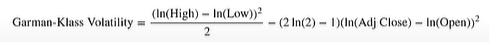

Measures the intraday volatility of an asset

In [152]:
 df['garman_klass_vol'] = ((np.log(df["high"])-np.log(df["low"]))**2)/2 - (2*np.log(2)-1)*((np.log(df["adj close"])- np.log(df["open"]))**2)
 # need to use np.log for logarithm 
 df

adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  garman_klass_vol  
date       ticker                                 
2016-03-03 A          946800.0         -0.001207  
           AAL       8812800.0         -0.000154  
           AAPL    147822800.0         -0.002434  
           ABBV      9283900.0         -0.044595  
           ABT      13516200.0         -0.007534  
...                        ...               ...  
2024-02-29 XYL       1829200.0          0.000124  
           YUM       2257700.0          0.000072  
           ZBH       2415800.0          0.000122  
           ZBRA       400900.0          0.000191  
           ZTS       2849200.0          0.000023  

[995328 rows x 7 columns]

In [153]:
df["rsi"] = df.groupby(level = 1)['adj close'].transform(lambda x : pandas_ta.rsi(close =x, length = 20))
df
# groupby(level = 1) will access the columns in the date, ticker row ; in our case the adj close
# .transform is to apply lambda function 
# the lambda function itself is to apply the RSI from the pandas_ta package for all x , for length 20

adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  garman_klass_vol        rsi  
date       ticker                                            
2016-03-03 A          946800.0         -0.001207        NaN  
           AAL       8812800.0         -0.000154        NaN  
           AAPL    147822800.0         -0.002434        NaN  
           ABBV      9283900.0         -0.044595        NaN  
           ABT      13516200.0         -0.007534        NaN  
...                        ...               ...        ...  
2024-02-29 XYL       1829200.0          0.000124  71.011659  
           YUM       2257700.0          0.000072  66.401726  
           ZBH       2415800.0          0.000122  51.330560  
           ZBRA       400900.0          0.000191  59.303912  
           ZTS       2849200.0          0.000023  56.950659  

[995328 rows x 8 columns]

### Calculation of Bband Code explanation

- df: This is presumably a pandas DataFrame, and the code is adding a new column named 'bb_low' to this DataFrame.

- df.groupby(level=1): This part of the code groups the DataFrame df by the second level of its multi-index. If your DataFrame has a multi-index, this line groups the data based on that index level.

- ['adj close']: This extracts the column named 'adj close' from the grouped DataFrame.

- .transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:, 0]): This is a transformation applied to each group using the transform method. It calculates Bollinger Bands for the log-transformed closing prices (np.log1p(x)) within each group.

- lambda x: This is an anonymous function that takes a group x as input.
- pandas_ta.bbands(close=np.log1p(x), length=20): This computes Bollinger Bands using the pandas_ta library on the log-transformed closing prices within each group.
- .iloc[:, 0]: This selects the first column of the Bollinger Bands DataFrame, presumably the lower band.
- Finally, the result is assigned to a new column in the original DataFrame (df['bb_low']).

In pandas, when you use the `groupby` function, you are essentially splitting the DataFrame into groups based on some criteria, and then you can perform operations on each group independently. The composition of a group depends on the criteria you specify for grouping.

In your code snippet:

```python
df.groupby(level=1)['adj close']
```

Here, `level=1` indicates that you are grouping the DataFrame based on the second level of its multi-index. If your DataFrame has a multi-index (a DataFrame with more than one index level), this line of code is creating groups based on the values at the second level of that multi-index.

For example, let's say your DataFrame looks something like this:

```python
                     adj close
date       symbol             
2022-01-01 AAPL      150.00
           MSFT       75.00
2022-01-02 AAPL      155.00
           MSFT       78.00
```

In this case, using `df.groupby(level=1)['adj close']` would create two groups:

1. Group for 'AAPL':
   ```
   date       symbol
   2022-01-01 AAPL      150.00
   2022-01-02 AAPL      155.00
   ```

2. Group for 'MSFT':
   ```
   date       symbol
   2022-01-01 MSFT       75.00
   2022-01-02 MSFT       78.00
   ```

So, each group comprises rows of the DataFrame where the values at the specified level of the multi-index are the same. The subsequent operations (like calculating Bollinger Bands) are then applied independently to each of these groups.

In [154]:
df['bb_low'] = df.groupby(level =1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,0])
# So Basically what happens is, we create groups of adj close price of each stock. then on this group containing the symbol's price we
# Apply the transform required to calculate bband

In [155]:
df['bb_mid'] = df.groupby(level =1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,1])
df['bb_high'] = df.groupby(level =1)['adj close'].transform(lambda x: pandas_ta.bbands(close = np.log1p(x), length =20).iloc[:,2])
df

adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-03-03 A          946800.0         -0.001207        NaN       NaN   
           AAL       8812800.0         -0.000154        NaN       NaN   
           AAPL    147822800.0         -0.002434        NaN       NaN   
           ABBV      9283900.0         -0.044595        NaN       NaN   
           ABT      13516200.0         -0.007534        NaN       NaN   
...                        ...               ...        ...       ...   
2024-02-29 XYL       1829200.0          0.000124  71.011659  4.754219   
           YUM       2257700.0          0.000072  66.401726  4.835538   
           ZBH       2415800.0          0.000122  51.330560  4.808937   
           ZBRA       400900.0          0.000191  59.303912  5.456878   
           ZTS       2849200.0          0.000023  56.950659  5.214124   

                     bb_mid   bb_high  
date       ticker                      
2016-03-03 A            NaN       NaN  
           AAL          NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
...                     ...       ...  
2024-02-29 XYL     4.815793  4.877366  
           YUM     4.896912  4.958286  
           ZBH     4.841167  4.873397  
           ZBRA    5.571519  5.686159  
           ZTS     5.267519  5.320913  

[995328 rows x 11 columns]

In [156]:
# We need to create a function to calculate the Average True Range(ATR)

def compute_atr(stock_data):
    atr = pandas_ta.atr(high= stock_data['high'],
    low = stock_data['low'],
    close =stock_data['close'],
    length=14)
    return atr.sub(atr.mean()).div(atr.std())
# the pandas_ta.art() method requires High, low, close and period data to be specified
# we dont return the atr value directly, instead we normalise the atr value by subtracting the mean value and dividing by standard dev
# why do we normalise ? Because we want to feed this to an ML model and do clustering later for which data needs to be normalised

df['atr']= df.groupby(level=1, group_keys = False).apply(compute_atr)

In [157]:
df

adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-03-03 A          946800.0         -0.001207        NaN       NaN   
           AAL       8812800.0         -0.000154        NaN       NaN   
           AAPL    147822800.0         -0.002434        NaN       NaN   
           ABBV      9283900.0         -0.044595        NaN       NaN   
           ABT      13516200.0         -0.007534        NaN       NaN   
...                        ...               ...        ...       ...   
2024-02-29 XYL       1829200.0          0.000124  71.011659  4.754219   
           YUM       2257700.0          0.000072  66.401726  4.835538   
           ZBH       2415800.0          0.000122  51.330560  4.808937   
           ZBRA       400900.0          0.000191  59.303912  5.456878   
           ZTS       2849200.0          0.000023  56.950659  5.214124   

                     bb_mid   bb_high       atr  
date       ticker                                
2016-03-03 A            NaN       NaN       NaN  
           AAL          NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
...                     ...       ...       ...  
2024-02-29 XYL     4.815793  4.877366  0.180198  
           YUM     4.896912  4.958286  0.229732  
           ZBH     4.841167  4.873397 -0.227114  
           ZBRA    5.571519  5.686159  0.355421  
           ZTS     5.267519  5.320913  0.914995  

[995328 rows x 12 columns]

In [158]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length =20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
# we calucluate MACD usoing clos price and the period (length / number of candles) and return the normalised values

df['macd']= df.groupby(level=1, group_keys= False)['adj close'].apply(compute_macd)
df



adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-03-03 A          946800.0         -0.001207        NaN       NaN   
           AAL       8812800.0         -0.000154        NaN       NaN   
           AAPL    147822800.0         -0.002434        NaN       NaN   
           ABBV      9283900.0         -0.044595        NaN       NaN   
           ABT      13516200.0         -0.007534        NaN       NaN   
...                        ...               ...        ...       ...   
2024-02-29 XYL       1829200.0          0.000124  71.011659  4.754219   
           YUM       2257700.0          0.000072  66.401726  4.835538   
           ZBH       2415800.0          0.000122  51.330560  4.808937   
           ZBRA       400900.0          0.000191  59.303912  5.456878   
           ZTS       2849200.0          0.000023  56.950659  5.214124   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2016-03-03 A            NaN       NaN       NaN       NaN  
           AAL          NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2024-02-29 XYL     4.815793  4.877366  0.180198  1.829336  
           YUM     4.896912  4.958286  0.229732  1.586266  
           ZBH     4.841167  4.873397 -0.227114  0.316534  
           ZBRA    5.571519  5.686159  0.355421  0.840471  
           ZTS     5.267519  5.320913  0.914995  0.559725  

[995328 rows x 13 columns]

In [159]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
## dollar vol is simple to calc, we div by 1e6 because there is millions of dollars traded everyday, for viewing simplicity
df

adj close       close        high         low        open  \
date       ticker                                                               
2016-03-03 A        36.738010   39.200001   39.230000   38.740002   38.919998   
           AAL      40.131641   41.880001   42.240002   41.230000   41.520000   
           AAPL     23.196976   25.375000   25.427500   25.112499   25.145000   
           ABBV     39.626129   55.930000   56.090000   55.150002   55.689999   
           ABT      33.467422   38.820000   38.889999   38.090000   38.560001   
...                       ...         ...         ...         ...         ...   
2024-02-29 XYL     127.050003  127.050003  127.480003  125.250000  125.910004   
           YUM     138.419998  138.419998  139.649994  137.949997  138.809998   
           ZBH     124.360001  124.360001  124.839996  122.900002  124.220001   
           ZBRA    279.480011  279.480011  282.000000  275.760010  276.049988   
           ZTS     198.330002  198.330002  200.529999  198.190002  200.500000   

                        volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2016-03-03 A          946800.0         -0.001207        NaN       NaN   
           AAL       8812800.0         -0.000154        NaN       NaN   
           AAPL    147822800.0         -0.002434        NaN       NaN   
           ABBV      9283900.0         -0.044595        NaN       NaN   
           ABT      13516200.0         -0.007534        NaN       NaN   
...                        ...               ...        ...       ...   
2024-02-29 XYL       1829200.0          0.000124  71.011659  4.754219   
           YUM       2257700.0          0.000072  66.401726  4.835538   
           ZBH       2415800.0          0.000122  51.330560  4.808937   
           ZBRA       400900.0          0.000191  59.303912  5.456878   
           ZTS       2849200.0          0.000023  56.950659  5.214124   

                     bb_mid   bb_high       atr      macd  dollar_volume  
date       ticker                                                         
2016-03-03 A            NaN       NaN       NaN       NaN      34.783548  
           AAL          NaN       NaN       NaN       NaN     353.672129  
           AAPL         NaN       NaN       NaN       NaN    3429.041901  
           ABBV         NaN       NaN       NaN       NaN     367.885020  
           ABT          NaN       NaN       NaN       NaN     452.352376  
...                     ...       ...       ...       ...            ...  
2024-02-29 XYL     4.815793  4.877366  0.180198  1.829336     232.399866  
           YUM     4.896912  4.958286  0.229732  1.586266     312.510830  
           ZBH     4.841167  4.873397 -0.227114  0.316534     300.428889  
           ZBRA    5.571519  5.686159  0.355421  0.840471     112.043536  
           ZTS     5.267519  5.320913  0.914995  0.559725     565.081841  

[995328 rows x 14 columns]

# 3. Aggregate to monthly level and filter top 150 liquid stocks for each month

- to reduce training time and experiment with features and strategies, we convert the business-daily data to month-end frequency

`df.unstack('ticker')['dollar volume'].resample('M').mean().stack('ticker').to_frame('dollar volume')`
- the above does the following; 
- take the dataframe and unstack it from the tcker level so that you get the every stock along with all its params datewise. so essential it will be a list of dates and the respective prices of a single stock. only once that is all shown, it will go and show the next stock details. 
- it is different from what we are seeing right now because here we are seeing for a given date, all the stocks and their prices; but after unstacking at ticker level we will see for a given stock, all the prices for all the days.
- after the unstack , we resample (by month hence M) the table so as to give us the monthy data. this data point will be the mean, so we are using mean(); end result will be for a given stock, we will see the mean values for all the columns every month now.
- then we restack it using stack('ticker') by ticker level and convert to dataframe. 
- so what this returns is a df just like the one we see above but instead of being ordered date wise, it is monthly.


`last_cols = [c for c in df.columns.unique(0) if c not in ['dollar volume', 'open', 'close', 'high', 'low', 'volume']]`

- this takes out all the columns which we will not use as features; so effectively last_cols only contains those data points which can be used as features. i.e the technical indicators
- furthermore we are not including the dollar volume in the features here because we will be using it separately to aggregate the volume
- later we will also apply the same unstacking-resampling-restacking combination on this to get the data we want

- so finally we will combine the above two processes and concatenate the resulting dfs to get the main df with all the features we want to work with. Additionally we will also drop all the readings with NaN values 
- there are some differenceces when doing the unstack-resmaple-stack part for the last columns; 
- first we dont need to unstack by ticker, we unstack the entire df and then pick out the cols listed in last_cols
- instead of applying the mean() to last_cols we use last() which takes the last reading of the month. ( using mean( will also work but gives different value. I believe we used last() because it is more relevant to consider it for the params we are working with))

In [160]:
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'open', 'high', 'low', 'close', 'volume']]
last_cols
data = (pd.concat([df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'), df.unstack()[last_cols].resample('M').last().stack('ticker')], axis = 1)).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2016-04-30 A           63.234639   38.460976         -0.001300  55.140779   
           AAL        362.444609   33.241802         -0.000915  25.755584   
           AAPL      3970.854119   21.423489         -0.003020  25.339804   
           ABBV       285.881309   43.633461         -0.043365  64.463228   
           ABT        309.851840   33.741268         -0.011388  32.794426   
...                          ...         ...               ...        ...   
2024-02-29 XYL        180.158837  127.050003          0.000124  71.011659   
           YUM        293.995977  138.419998          0.000072  66.401726   
           ZBH        222.636824  124.360001          0.000122  51.330560   
           ZBRA       118.319971  279.480011          0.000191  59.303912   
           ZTS        457.126920  198.330002          0.000023  56.950659   

                     bb_low    bb_mid   bb_high       atr      macd  
date       ticker                                                    
2016-04-30 A       3.629313  3.670624  3.711934 -1.278961  0.095241  
           AAL     3.549626  3.642540  3.735453  0.595127 -1.541273  
           AAPL    3.135048  3.231915  3.328782 -1.033812 -0.522189  
           ABBV    3.740925  3.778749  3.816573 -0.965265  0.255672  
           ABT     3.579932  3.641429  3.702927 -0.896072 -0.013603  
...                     ...       ...       ...       ...       ...  
2024-02-29 XYL     4.754219  4.815793  4.877366  0.180198  1.829336  
           YUM     4.835538  4.896912  4.958286  0.229732  1.586266  
           ZBH     4.808937  4.841167  4.873397 -0.227114  0.316534  
           ZBRA    5.456878  5.571519  5.686159  0.355421  0.840471  
           ZTS     5.214124  5.267519  5.320913  0.914995  0.559725  

[46993 rows x 9 columns]

### Calculate the 5 YR rolling avg dollar volume

In [161]:
data['dollar_volume'] = (data.loc[:, 'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
# above accesses all the data in the dol_vol col and unstacks it by ticker level; so we get all the data of one stock at a time.
# then on this data first we define the rolling period which is 5 years; since previously we have aggregated at monthly level
# we do 5*12 and then take the mean. (mean will be of the dol_vol for the past 60 months (5*12))
data['dollar_volume_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending = False))
# now we need to rank the stocks based on their dollar_vol; the above does the following
# first takes the previous unstacked data nad groups it by date; i.e on a montly level
# then it ranks the datapoints (stocks) based on the dollar_vol
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume', 'dollar_volume_rank'], axis=1)
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-03-31 AAL      40.966812         -0.000314  44.018255  3.677781   
           AAPL     33.526375         -0.001813  72.900351  3.498123   
           ABBV     47.930614         -0.037511  58.182272  3.870225   
           ABT      39.256165         -0.005647  52.441465  3.692381   
           ACN     107.226440         -0.005355  45.957867  4.674704   
...                       ...               ...        ...       ...   
2024-02-29 VRTX    420.739990          0.000069  50.196642  6.026534   
           VZ       40.020000          0.000043  50.636063  3.692048   
           WFC      55.590000          0.000056  73.417265  3.849400   
           WMT      58.411064         -0.000004  64.642101  4.021267   
           XOM     104.519997          0.000032  57.194210  4.613081   

                     bb_mid   bb_high       atr      macd  
date       ticker                                          
2017-03-31 AAL     3.739329  3.800877  0.476588 -0.913156  
           AAPL    3.522021  3.545919 -1.178403 -0.006142  
           ABBV    3.893808  3.917391 -1.633329  0.054303  
           ABT     3.707867  3.723352 -1.374030 -0.145361  
           ACN     4.708890  4.743076 -0.995779 -0.314783  
...                     ...       ...       ...       ...  
2024-02-29 VRTX    6.051871  6.077209  1.227815  0.054296  
           VZ      3.727152  3.762255 -0.350648  0.017428  
           WFC     3.950274  4.051148  0.043141  1.931379  
           WMT     4.063990  4.106714  0.741943  2.311592  
           XOM     4.641740  4.670399  0.210022  0.765456  

[12516 rows x 8 columns]

# 4. Calculate Monthly Returns for different Time horizons as features

- to capture time series dynamics that reflect. for example, momentum patterns, we need to compute historical returns using .pct_change(lag), which basically returns over various montly periods identified by lags

In [162]:
g = df.xs('AAPL', level=1) # only taking aapl for experimentation
lags =[ 1, 2, 3, 6, 9, 12]
outlier_cutoff = 0.005 # for 99.5 percent
for lag in lags:
    g[f'return_{lag}m'] = (g['adj close'].pct_change(lag)
                            .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                            upper = x.quantile(1- outlier_cutoff)))
                            .add(1)
                            .pow(1/lag)
                            .sub(1))

`.pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff), upper=x.quantile(1 - outlier_cutoff))):
`
- The `.pipe()` method is a way to apply a function to the result of the previous operation, which is the percentage change in the 'adj close' column over a lag period.
- The lambda function passed to `.pipe()` uses the `clip()` method on the Series x. The purpose of clip is to limit the values in the Series to a specified range.
- `x.quantile(outlier_cutoff)` Imagine you have a list of numbers (the percentage changes). The .clip() part is like putting a range around those numbers to ignore extreme values.
The extreme values are determined by looking at the list in terms of percentiles. If you split the list into 100 equal parts (percentiles), `x.quantile(outlier_cutoff)` gives you a value below which only a certain percentage of your numbers fall (outlier_cutoff percent), and `x.quantile(1 - outlier_cutoff)` gives you a value above which only a certain percentage of your numbers fall (1 - outlier_cutoff percent).
So, we're saying, "Ignore the really high and really low values, just focus on the middle part."
- `.add(1):` After we've focused on the middle part of our numbers, we add 1 to each of them. This might sound a bit strange, but it's a trick we use in finance. If you have a percentage change, adding 1 turns it into a multiplier. For example, if you had a 5% change, adding 1 makes it 1.05, which means you increased by 5%.
- `.pow(1 / lag)`: Now, we want to think about the whole year. Imagine you had monthly changes. We're raising each number to the power of 1 divided by the number of months (lag). This is a way to "annualize" our changes. It's like asking, "If I kept making this same change every month, what would it look like over a whole year?"
- `.sub(1)`: Finally, after thinking about a whole year, we subtract 1. This undoes the trick we did in step 4. So, if we had multiplied by 1.05 in step 4, now we subtract 1 to get back to the 5% change we started with.

In [163]:
def calculate_returns(df):
    lags = [1, 2, 3, 6, 9, 12]
    outlier_cutoff = 0.005
    for lag in lags:
        df[f'return_{lag}m'] = (df['adj close'].pct_change(lag)
                                .pipe(lambda x: x.clip(lower = x.quantile(outlier_cutoff),
                                upper = x.quantile(1-outlier_cutoff)))
                                .add(1)
                                .pow(1/lag)
                                .sub(1))
    return df
# Applying the procedure on the experimented AAPL case to a function so that it can be used throughout

In [164]:
data = data.groupby(level =1, group_keys = False).apply(calculate_returns).dropna()
# APply the return calculating fucntion to all the stocks in the data dataframe (by grouping at level 1). Following that we drop all rows which have an NaN value
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-03-31 AAL      50.741047          0.000320  45.783650  3.914548   
           AAPL     39.774742         -0.000687  44.825032  3.691662   
           ABBV     71.955070         -0.028509  33.321285  4.249801   
           ABT      54.104717         -0.003414  47.670025  3.990271   
           ACN     140.065796         -0.000547  46.272132  4.906706   
...                       ...               ...        ...       ...   
2024-02-29 VRTX    420.739990          0.000069  50.196642  6.026534   
           VZ       40.020000          0.000043  50.636063  3.692048   
           WFC      55.590000          0.000056  73.417265  3.849400   
           WMT      58.411064         -0.000004  64.642101  4.021267   
           XOM     104.519997          0.000032  57.194210  4.613081   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2018-03-31 AAL     3.980226  4.045904  1.459076 -0.496878  -0.042212   
           AAPL    3.745862  3.800061 -0.738415 -0.446855  -0.058051   
           ABBV    4.430123  4.610445  2.394590 -2.606800  -0.176798   
           ABT     4.035483  4.080694 -0.556446 -0.256864  -0.006796   
           ACN     4.973462  5.040219 -0.163703 -0.810433  -0.046643   
...                     ...       ...       ...       ...        ...   
2024-02-29 VRTX    6.051871  6.077209  1.227815  0.054296  -0.029166   
           VZ      3.727152  3.762255 -0.350648  0.017428  -0.055018   
           WFC     3.950274  4.051148  0.043141  1.931379   0.115593   
           WMT     4.063990  4.106714  0.741943  2.311592   0.064024   
           XOM     4.641740  4.670399  0.210022  0.765456   0.026081   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2018-03-31 AAL     -0.021024   0.000192   0.015801   0.004254    0.017991  
           AAPL     0.003083  -0.001511   0.015550   0.018421    0.014344  
           ABBV    -0.081614  -0.004783   0.012954   0.032691    0.034437  
           ABT     -0.018183   0.017994   0.021154   0.025241    0.027095  
           ACN     -0.022659   0.000892   0.023189   0.025388    0.022514  
...                      ...        ...        ...        ...         ...  
2024-02-29 VRTX     0.016877   0.058456   0.031973   0.029608    0.031411  
           VZ       0.038961   0.020157   0.029158   0.019270    0.008595  
           WFC      0.066467   0.078780   0.053597   0.040528    0.017164  
           WMT      0.056087   0.042671   0.013739   0.021021    0.019174  
           XOM      0.027193   0.008848  -0.007225   0.005477   -0.001260  

[10361 rows x 14 columns]

# 5. Fama-French Factors and Calculate ROlling Factor Betas

- Use Fama-French Data to estimate the exposure of assets to common risk factors using Linear Regression
- 5 Fama-French Factors : Market Risk, Size, Vlaue, Operating Profitability, Investment. 
- these 5 have been shown empirically to explain asset returns and are commonly used to asses risk return profilkes of portfolios. 
- therefore we are including these past factor exposures as financial features in models
- historical factor returns using pd_datareader
- estimate historical exposures using RollingOLS rolling linear regression 

In [165]:
# we use the [0] to access only the monthhly returns part of the dictionary. otherwise there will be two montly and annual
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='2010')[0].drop('RF', axis=1)
factor_data

Mkt-RF   SMB   HML   RMW   CMA
Date                                   
2010-01   -3.36  0.34  0.43 -1.27  0.46
2010-02    3.40  1.51  3.23 -0.27  1.43
2010-03    6.31  1.85  2.21 -0.65  1.69
2010-04    2.00  4.98  2.89  0.69  1.72
2010-05   -7.89  0.04 -2.44  1.30 -0.21
...         ...   ...   ...   ...   ...
2023-09   -5.24 -1.80  1.52  1.86 -0.83
2023-10   -3.19 -4.04  0.19  2.46 -0.66
2023-11    8.84 -0.12  1.64 -3.91 -1.00
2023-12    4.85  7.32  4.93 -3.06  1.32
2024-01    0.70 -5.73 -2.39  0.68 -0.95

[169 rows x 5 columns]

In [166]:
factor_data.index = factor_data.index.to_timestamp()
factor_data
# note here that the dates are beginning of the month while our data df is using end of month

Mkt-RF   SMB   HML   RMW   CMA
Date                                      
2010-01-01   -3.36  0.34  0.43 -1.27  0.46
2010-02-01    3.40  1.51  3.23 -0.27  1.43
2010-03-01    6.31  1.85  2.21 -0.65  1.69
2010-04-01    2.00  4.98  2.89  0.69  1.72
2010-05-01   -7.89  0.04 -2.44  1.30 -0.21
...            ...   ...   ...   ...   ...
2023-09-01   -5.24 -1.80  1.52  1.86 -0.83
2023-10-01   -3.19 -4.04  0.19  2.46 -0.66
2023-11-01    8.84 -0.12  1.64 -3.91 -1.00
2023-12-01    4.85  7.32  4.93 -3.06  1.32
2024-01-01    0.70 -5.73 -2.39  0.68 -0.95

[169 rows x 5 columns]

this converts the data to the end of the month. resample makes it montly and .last() takes the last date of the month. THen we divide by 100 because we need it in percentage format


In [167]:
factor_data=factor_data.resample('M').last().div(100)
factor_data.index.name ='date'
factor_data

Mkt-RF     SMB     HML     RMW     CMA
date                                              
2010-01-31 -0.0336  0.0034  0.0043 -0.0127  0.0046
2010-02-28  0.0340  0.0151  0.0323 -0.0027  0.0143
2010-03-31  0.0631  0.0185  0.0221 -0.0065  0.0169
2010-04-30  0.0200  0.0498  0.0289  0.0069  0.0172
2010-05-31 -0.0789  0.0004 -0.0244  0.0130 -0.0021
...            ...     ...     ...     ...     ...
2023-09-30 -0.0524 -0.0180  0.0152  0.0186 -0.0083
2023-10-31 -0.0319 -0.0404  0.0019  0.0246 -0.0066
2023-11-30  0.0884 -0.0012  0.0164 -0.0391 -0.0100
2023-12-31  0.0485  0.0732  0.0493 -0.0306  0.0132
2024-01-31  0.0070 -0.0573 -0.0239  0.0068 -0.0095

[169 rows x 5 columns]

Now we join the factor data to the 1month returns so that we can calculate the beta by regreessing it and 
if the factor is predictive we have it at the beginning of the month and regress it with the end of the month

In Detail Explanation of Above Objective and why we are doing it. Point 4 and 5 Important

1. **Factor Data (Fama-French):**
   - Fama-French factors are variables that researchers believe influence stock returns. The common factors include:
     - Market Return: Reflects the overall market performance.
     - Size (SMB): Measures the effect of a company's size on its return.
     - Value (HML): Captures the impact of a company's valuation.
     - Profitability (RMW): Represents the effect of a company's profitability.
     - Investment (CMA): Reflects the impact of a company's investment decisions.

2. **1-Month Returns:**
   - For each stock, you have the percentage change in its stock price over a one-month period. This is a simple measure of how the stock performed during that specific month.

3. **Joining Factor Data to 1-Month Returns:**
   - The factor data (multiple factors for each stock) is combined with the 1-month returns data. This is typically done using a common identifier, such as the stock ticker symbol.
   - The result is a dataset where each row represents a specific stock, and the columns include the Fama-French factor values and the corresponding 1-month return for that stock.

4. **Calculating Beta through Regression:**
   - The regression model is used to understand how a stock's return is influenced by changes in the Fama-French factors. The regression equation is typically written as:
   
     - Stock Return = beta_0 + beta_1 * Market Factor + beta_2 * Size Factor + beta_3 * Value Factor + beta_4 * Profitability Factor + beta_5 * Investment Factor + epsilon


     - \(\beta_1, \beta_2, \beta_3, \beta_4, \beta_5\) are the beta coefficients that indicate the sensitivity of the stock's return to each respective factor.
     - \(\epsilon\) is the error term, representing unexplained variation in the stock's return.

   - Running this regression for each stock produces beta values that quantify how much a stock's return tends to move concerning changes in the Fama-French factors.

5. **Predictive Power of Factors:**
   - If the factor data is considered predictive, having it at the beginning of the month allows for an analysis of how well it predicts the stock's return for that month.
   - You regress the 1-month return on the Fama-French factors, and the resulting beta coefficients help quantify the impact of each factor on the stock's return.

In summary, this process involves combining Fama-French factor data with individual stock returns, running regressions to calculate beta coefficients, and assessing the predictive power of these factors in explaining stock returns for a given month.

In [168]:
factor_data = factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-03-31 AAL    -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.042212
           AAPL   -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.058051
           ABBV   -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.176798
           ABT    -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.006796
           ACN    -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.046643
...                   ...     ...     ...     ...     ...        ...
2024-01-31 VRTX    0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.065104
           VZ      0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.128136
           WFC     0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.019504
           WMT     0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.048208
           XOM     0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.028306

[10218 rows x 6 columns]

In [169]:
#cross-check
# factor_data.xs('AAPL', level=1).head()


Filter stocks with less than 10 months data. 
Because using rolling window for regression of 2yrs ~ 24 months. so we need only stocks which have enough data

In [170]:
factor_data.groupby(level=1).size()

ticker
AAL     71
AAPL    71
ABBV    71
ABNB    14
ABT     71
        ..
WDC     51
WFC     71
WMT     71
WYNN    65
XOM     71
Length: 172, dtype: int64

In [171]:
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >=10]

In [172]:
valid_stocks

ticker
AAL     71
AAPL    71
ABBV    71
ABNB    14
ABT     71
        ..
WDC     51
WFC     71
WMT     71
WYNN    65
XOM     71
Length: 164, dtype: int64

In [173]:
factor_data.index.get_level_values('ticker')

Index(['AAL', 'AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMAT', 'AMD',
       'AMGN',
       ...
       'UNP', 'UPS', 'USB', 'V', 'VLO', 'VRTX', 'VZ', 'WFC', 'WMT', 'XOM'],
      dtype='object', name='ticker', length=10218)

In [174]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date       ticker                                                   
2018-03-31 AAL    -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.042212
           AAPL   -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.058051
           ABBV   -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.176798
           ABT    -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.006796
           ACN    -0.0235  0.0359 -0.0021 -0.0046  0.0001  -0.046643
...                   ...     ...     ...     ...     ...        ...
2024-01-31 VRTX    0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.065104
           VZ      0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.128136
           WFC     0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.019504
           WMT     0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.048208
           XOM     0.0070 -0.0573 -0.0239  0.0068 -0.0095   0.028306

[10175 rows x 6 columns]

- Calculate Rolling Factor Betas

`factor_data.groupby(level=1, group_keys=False):`

The groupby method is used to group the data in factor_data by a specific level (level 1 in this case).
group_keys=False ensures that the resulting DataFrame doesn't have the grouping key as part of the index.
`.apply(lambda x: ...):`

For each group of data (each stock), the apply method is used to perform operations specified in the lambda function.
`RollingOLS(...):`

RollingOLS is a rolling ordinary least squares regression model. It calculates beta coefficients for each rolling window of the data.
endog is the dependent variable (in this case, 'return_1m').
exog is the matrix of independent variables, including a constant term (intercept) added using sm.add_constant.
window specifies the size of the rolling window (maximum 24 or the number of observations if less).
min_nobs is set to ensure a minimum number of observations for the regression.
`.fit(params_only=True):`

The fit method is applied to perform the regression.
params_only=True ensures that only the estimated parameters (coefficients) are returned, not the full regression results.
`.params:`

After fitting the model, .params is used to extract the estimated parameters, which include the beta coefficients for each factor.
`.drop('const', axis=1):`

The constant term (intercept) is dropped from the results, as it's not needed for beta calculation.
The result (betas):

The final result is a DataFrame with beta coefficients for each Fama-French factor for each stock, calculated using a rolling window approach.

In [175]:
betas = (factor_data.groupby(level=1,
                    group_keys =False)
                    .apply(lambda x: RollingOLS(endog =x['return_1m'],
                    exog = sm.add_constant(x.drop('return_1m', axis =1)),
                    window = min(24, x.shape[0]),
                    min_nobs = len(x.columns)+1)
                    
        .fit(params_only = True)
        .params
        .drop('const', axis=1)))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2018-03-31 AAL          NaN       NaN       NaN       NaN       NaN
           AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-01-31 VRTX    0.415344  0.396729 -0.849131  0.199172  1.002521
           VZ      0.480825 -1.086516  0.679389 -0.030913 -0.342825
           WFC     1.079384  0.333310  1.642212 -0.209467 -1.317925
           WMT     0.542134  0.233795 -0.912352  0.669353  0.889301
           XOM     0.785142  0.059118  0.444968  0.817024  0.642085

[10175 rows x 5 columns]

- now join to the data df so as to get the full feature set
- problem is the time alignment
- rolling factor betas are based on the start of the month but our returns data is the end of the month
- so we will need to shift the betas by a month so that they align properly.

In [176]:
data = data.join(betas.groupby('ticker').shift())
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-03-31 AAL      50.741047          0.000320  45.783650  3.914548   
           AAPL     39.774742         -0.000687  44.825032  3.691662   
           ABBV     71.955070         -0.028509  33.321285  4.249801   
           ABT      54.104717         -0.003414  47.670025  3.990271   
           ACN     140.065796         -0.000547  46.272132  4.906706   
...                       ...               ...        ...       ...   
2024-02-29 VRTX    420.739990          0.000069  50.196642  6.026534   
           VZ       40.020000          0.000043  50.636063  3.692048   
           WFC      55.590000          0.000056  73.417265  3.849400   
           WMT      58.411064         -0.000004  64.642101  4.021267   
           XOM     104.519997          0.000032  57.194210  4.613081   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2018-03-31 AAL     3.980226  4.045904  1.459076 -0.496878  -0.042212   
           AAPL    3.745862  3.800061 -0.738415 -0.446855  -0.058051   
           ABBV    4.430123  4.610445  2.394590 -2.606800  -0.176798   
           ABT     4.035483  4.080694 -0.556446 -0.256864  -0.006796   
           ACN     4.973462  5.040219 -0.163703 -0.810433  -0.046643   
...                     ...       ...       ...       ...        ...   
2024-02-29 VRTX    6.051871  6.077209  1.227815  0.054296  -0.029166   
           VZ      3.727152  3.762255 -0.350648  0.017428  -0.055018   
           WFC     3.950274  4.051148  0.043141  1.931379   0.115593   
           WMT     4.063990  4.106714  0.741943  2.311592   0.064024   
           XOM     4.641740  4.670399  0.210022  0.765456   0.026081   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2018-03-31 AAL     -0.021024   0.000192   0.015801   0.004254    0.017991   
           AAPL     0.003083  -0.001511   0.015550   0.018421    0.014344   
           ABBV    -0.081614  -0.004783   0.012954   0.032691    0.034437   
           ABT     -0.018183   0.017994   0.021154   0.025241    0.027095   
           ACN     -0.022659   0.000892   0.023189   0.025388    0.022514   
...                      ...        ...        ...        ...         ...   
2024-02-29 VRTX     0.016877   0.058456   0.031973   0.029608    0.031411   
           VZ       0.038961   0.020157   0.029158   0.019270    0.008595   
           WFC      0.066467   0.078780   0.053597   0.040528    0.017164   
           WMT      0.056087   0.042671   0.013739   0.021021    0.019174   
           XOM      0.027193   0.008848  -0.007225   0.005477   -0.001260   

                   Mkt-RF  SMB  HML  RMW  CMA  
date       ticker                              
2018-03-31 AAL        NaN  NaN  NaN  NaN  NaN  
           AAPL       NaN  NaN  NaN  NaN  NaN  
           ABBV       NaN  NaN  NaN  NaN  NaN  
           ABT        NaN  NaN  NaN  NaN  NaN  
           ACN        NaN  NaN  NaN  NaN  NaN  
...                   ...  ...  ...  ...  ...  
2024-02-29 VRTX       NaN  NaN  NaN  NaN  NaN  
           VZ         NaN  NaN  NaN  NaN  NaN  
           WFC        NaN  NaN  NaN  NaN  NaN  
           WMT        NaN  NaN  NaN  NaN  NaN  
           XOM        NaN  NaN  NaN  NaN  NaN  

[10361 rows x 19 columns]

In [177]:
data.loc

- Imputation of missing data

In [178]:
factors = ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']
data.loc[:, factors] = data.groupby('ticker', group_keys=False)[factors].apply(lambda x: x.fillna(x.mean()))
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2018-03-31 AAL      50.741047          0.000320  45.783650  3.914548   
           AAPL     39.774742         -0.000687  44.825032  3.691662   
           ABBV     71.955070         -0.028509  33.321285  4.249801   
           ABT      54.104717         -0.003414  47.670025  3.990271   
           ACN     140.065796         -0.000547  46.272132  4.906706   
...                       ...               ...        ...       ...   
2024-02-29 VRTX    420.739990          0.000069  50.196642  6.026534   
           VZ       40.020000          0.000043  50.636063  3.692048   
           WFC      55.590000          0.000056  73.417265  3.849400   
           WMT      58.411064         -0.000004  64.642101  4.021267   
           XOM     104.519997          0.000032  57.194210  4.613081   

                     bb_mid   bb_high       atr      macd  return_1m  \
date       ticker                                                      
2018-03-31 AAL     3.980226  4.045904  1.459076 -0.496878  -0.042212   
           AAPL    3.745862  3.800061 -0.738415 -0.446855  -0.058051   
           ABBV    4.430123  4.610445  2.394590 -2.606800  -0.176798   
           ABT     4.035483  4.080694 -0.556446 -0.256864  -0.006796   
           ACN     4.973462  5.040219 -0.163703 -0.810433  -0.046643   
...                     ...       ...       ...       ...        ...   
2024-02-29 VRTX    6.051871  6.077209  1.227815  0.054296  -0.029166   
           VZ      3.727152  3.762255 -0.350648  0.017428  -0.055018   
           WFC     3.950274  4.051148  0.043141  1.931379   0.115593   
           WMT     4.063990  4.106714  0.741943  2.311592   0.064024   
           XOM     4.641740  4.670399  0.210022  0.765456   0.026081   

                   return_2m  return_3m  return_6m  return_9m  return_12m  \
date       ticker                                                           
2018-03-31 AAL     -0.021024   0.000192   0.015801   0.004254    0.017991   
           AAPL     0.003083  -0.001511   0.015550   0.018421    0.014344   
           ABBV    -0.081614  -0.004783   0.012954   0.032691    0.034437   
           ABT     -0.018183   0.017994   0.021154   0.025241    0.027095   
           ACN     -0.022659   0.000892   0.023189   0.025388    0.022514   
...                      ...        ...        ...        ...         ...   
2024-02-29 VRTX     0.016877   0.058456   0.031973   0.029608    0.031411   
           VZ       0.038961   0.020157   0.029158   0.019270    0.008595   
           WFC      0.066467   0.078780   0.053597   0.040528    0.017164   
           WMT      0.056087   0.042671   0.013739   0.021021    0.019174   
           XOM      0.027193   0.008848  -0.007225   0.005477   -0.001260   

                     Mkt-RF       SMB       HML       RMW       CMA  
date       ticker                                                    
2018-03-31 AAL     1.246661  1.396400  0.500848  0.193044  0.774987  
           AAPL    1.325446 -0.364621 -0.616325  0.486057  0.612498  
           ABBV    0.457360  0.538451 -0.146057  0.476748  0.345620  
           ABT     0.812395 -0.141865 -0.501609  0.290677  0.985900  
           ACN     1.224202 -0.169414 -0.298810  0.314807  0.171016  
...                     ...       ...       ...       ...       ...  
2024-02-29 VRTX    0.517520  0.026918 -0.892113  0.091122  0.849009  
           VZ      0.476582 -0.378145  0.137551  0.274157  0.372899  
           WFC     1.065981 -0.078617  1.511249 -0.734053 -0.727279  
           WMT     0.597418 -0.419763 -0.329581  0.298526  0.672027  
           XOM     1.110509  0.229643  0.754449 -0.479640  0.558351  

[10361 rows x 19 columns]

In [179]:
data = data.drop('adj close', axis =1)
data =data.dropna()

data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10222 entries, (Timestamp('2018-03-31 00:00:00'), 'AAL') to (Timestamp('2024-02-29 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  10222 non-null  float64
 1   rsi               10222 non-null  float64
 2   bb_low            10222 non-null  float64
 3   bb_mid            10222 non-null  float64
 4   bb_high           10222 non-null  float64
 5   atr               10222 non-null  float64
 6   macd              10222 non-null  float64
 7   return_1m         10222 non-null  float64
 8   return_2m         10222 non-null  float64
 9   return_3m         10222 non-null  float64
 10  return_6m         10222 non-null  float64
 11  return_9m         10222 non-null  float64
 12  return_12m        10222 non-null  float64
 13  Mkt-RF            10222 non-null  float64
 14  SMB               10222 non-null  float64
 15  HML        

In [180]:
data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-03-31 AAL             0.000320  45.783650  3.914548  3.980226  4.045904   
           AAPL           -0.000687  44.825032  3.691662  3.745862  3.800061   
           ABBV           -0.028509  33.321285  4.249801  4.430123  4.610445   
           ABT            -0.003414  47.670025  3.990271  4.035483  4.080694   
           ACN            -0.000547  46.272132  4.906706  4.973462  5.040219   
...                             ...        ...       ...       ...       ...   
2024-02-29 VRTX            0.000069  50.196642  6.026534  6.051871  6.077209   
           VZ              0.000043  50.636063  3.692048  3.727152  3.762255   
           WFC             0.000056  73.417265  3.849400  3.950274  4.051148   
           WMT            -0.000004  64.642101  4.021267  4.063990  4.106714   
           XOM             0.000032  57.194210  4.613081  4.641740  4.670399   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2018-03-31 AAL     1.459076 -0.496878  -0.042212  -0.021024   0.000192   
           AAPL   -0.738415 -0.446855  -0.058051   0.003083  -0.001511   
           ABBV    2.394590 -2.606800  -0.176798  -0.081614  -0.004783   
           ABT    -0.556446 -0.256864  -0.006796  -0.018183   0.017994   
           ACN    -0.163703 -0.810433  -0.046643  -0.022659   0.000892   
...                     ...       ...        ...        ...        ...   
2024-02-29 VRTX    1.227815  0.054296  -0.029166   0.016877   0.058456   
           VZ     -0.350648  0.017428  -0.055018   0.038961   0.020157   
           WFC     0.043141  1.931379   0.115593   0.066467   0.078780   
           WMT     0.741943  2.311592   0.064024   0.056087   0.042671   
           XOM     0.210022  0.765456   0.026081   0.027193   0.008848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-03-31 AAL      0.015801   0.004254    0.017991  1.246661  1.396400   
           AAPL     0.015550   0.018421    0.014344  1.325446 -0.364621   
           ABBV     0.012954   0.032691    0.034437  0.457360  0.538451   
           ABT      0.021154   0.025241    0.027095  0.812395 -0.141865   
           ACN      0.023189   0.025388    0.022514  1.224202 -0.169414   
...                      ...        ...         ...       ...       ...   
2024-02-29 VRTX     0.031973   0.029608    0.031411  0.517520  0.026918   
           VZ       0.029158   0.019270    0.008595  0.476582 -0.378145   
           WFC      0.053597   0.040528    0.017164  1.065981 -0.078617   
           WMT      0.013739   0.021021    0.019174  0.597418 -0.419763   
           XOM     -0.007225   0.005477   -0.001260  1.110509  0.229643   

                        HML       RMW       CMA  
date       ticker                                
2018-03-31 AAL     0.500848  0.193044  0.774987  
           AAPL   -0.616325  0.486057  0.612498  
           ABBV   -0.146057  0.476748  0.345620  
           ABT    -0.501609  0.290677  0.985900  
           ACN    -0.298810  0.314807  0.171016  
...                     ...       ...       ...  
2024-02-29 VRTX   -0.892113  0.091122  0.849009  
           VZ      0.137551  0.274157  0.372899  
           WFC     1.511249 -0.734053 -0.727279  
           WMT    -0.329581  0.298526  0.672027  
           XOM     0.754449 -0.479640  0.558351  

[10222 rows x 18 columns]

# Data is ready. ML Now

### We need to decide which ML model and approach to use for predictions
further Ml can be used for a variety of things
- Prediction of prices
- At the end of each month decide which stocks to keep in portfolio for the next month
- Generate Buy and Sell signals for the portfolio
- Make weights of componenets of the portfolio

We will be doing only Long Portfolio

# 6. For Each month, fit a K.Means Clustering Algorithm to group similar assets based on their features

## K-Means Clustering
- May have to initialize predefined centroids or decide on the ideal number of clusters based on your own research
- We will use 4
- For viz we will use k-means++ initialization but later pre-define our centroids for each cluster

In [181]:
# from sklearn.cluster import KMeans
# # fit kmeans model to each month and assign a cluster to each stock

# def get_clusters(df):
#     df['cluster']= KMeans(n_clusters = 4, random_state=0, init = 'random').fit(df).labels_
    
#     return df

# data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)
# # this takes the data, groups it by month, then assigns a cluster to each stock
# data

This part here is manual visualization of KMeans without specific centroids.

Here we are using the ATR and RSI ( columns 5 and 1) as axes. 

In [182]:
# def plot_clusters(data):

#     cluster_0 = data[data['cluster']==0]
#     cluster_1 = data[data['cluster']==1]
#     cluster_2 = data[data['cluster']==2]
#     cluster_3 = data[data['cluster']==3]

#     plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
#     plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
#     plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
#     plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
#     plt.legend()
#     plt.show()
#     return

In [183]:
# plt.style.use('ggplot')

# for i in data.index.get_level_values('date').unique().tolist():
    
#     g = data.xs(i, level=0)
    
#     plt.title(f'Date {i}')
    
#     plot_clusters(g)

### Applying Pre-Defined Centroids

The reasoning here is that we want the centroids to be around 70, 55, 45 and 30 value of the RSI

In [184]:
target_rsi_values = [30, 45, 55, 70]

initial_centroids = np.zeros((len(target_rsi_values), 18))

initial_centroids[:, 1] = target_rsi_values

initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [185]:
from sklearn.cluster import KMeans

# data = data.drop('cluster', axis=1)

def get_clusters(df):
    df['cluster'] = KMeans(n_clusters=4,
                           random_state=0,
                           init=initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date', group_keys=False).apply(get_clusters)

data

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-03-31 AAL             0.000320  45.783650  3.914548  3.980226  4.045904   
           AAPL           -0.000687  44.825032  3.691662  3.745862  3.800061   
           ABBV           -0.028509  33.321285  4.249801  4.430123  4.610445   
           ABT            -0.003414  47.670025  3.990271  4.035483  4.080694   
           ACN            -0.000547  46.272132  4.906706  4.973462  5.040219   
...                             ...        ...       ...       ...       ...   
2024-02-29 VRTX            0.000069  50.196642  6.026534  6.051871  6.077209   
           VZ              0.000043  50.636063  3.692048  3.727152  3.762255   
           WFC             0.000056  73.417265  3.849400  3.950274  4.051148   
           WMT            -0.000004  64.642101  4.021267  4.063990  4.106714   
           XOM             0.000032  57.194210  4.613081  4.641740  4.670399   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2018-03-31 AAL     1.459076 -0.496878  -0.042212  -0.021024   0.000192   
           AAPL   -0.738415 -0.446855  -0.058051   0.003083  -0.001511   
           ABBV    2.394590 -2.606800  -0.176798  -0.081614  -0.004783   
           ABT    -0.556446 -0.256864  -0.006796  -0.018183   0.017994   
           ACN    -0.163703 -0.810433  -0.046643  -0.022659   0.000892   
...                     ...       ...        ...        ...        ...   
2024-02-29 VRTX    1.227815  0.054296  -0.029166   0.016877   0.058456   
           VZ     -0.350648  0.017428  -0.055018   0.038961   0.020157   
           WFC     0.043141  1.931379   0.115593   0.066467   0.078780   
           WMT     0.741943  2.311592   0.064024   0.056087   0.042671   
           XOM     0.210022  0.765456   0.026081   0.027193   0.008848   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-03-31 AAL      0.015801   0.004254    0.017991  1.246661  1.396400   
           AAPL     0.015550   0.018421    0.014344  1.325446 -0.364621   
           ABBV     0.012954   0.032691    0.034437  0.457360  0.538451   
           ABT      0.021154   0.025241    0.027095  0.812395 -0.141865   
           ACN      0.023189   0.025388    0.022514  1.224202 -0.169414   
...                      ...        ...         ...       ...       ...   
2024-02-29 VRTX     0.031973   0.029608    0.031411  0.517520  0.026918   
           VZ       0.029158   0.019270    0.008595  0.476582 -0.378145   
           WFC      0.053597   0.040528    0.017164  1.065981 -0.078617   
           WMT      0.013739   0.021021    0.019174  0.597418 -0.419763   
           XOM     -0.007225   0.005477   -0.001260  1.110509  0.229643   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2018-03-31 AAL     0.500848  0.193044  0.774987        1  
           AAPL   -0.616325  0.486057  0.612498        1  
           ABBV   -0.146057  0.476748  0.345620        0  
           ABT    -0.501609  0.290677  0.985900        1  
           ACN    -0.298810  0.314807  0.171016        1  
...                     ...       ...       ...      ...  
2024-02-29 VRTX   -0.892113  0.091122  0.849009        1  
           VZ      0.137551  0.274157  0.372899        1  
           WFC     1.511249 -0.734053 -0.727279        3  
           WMT    -0.329581  0.298526  0.672027        3  
           XOM     0.754449 -0.479640  0.558351        2  

[10222 rows x 19 columns]

In [186]:

def plot_clusters(data):

    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]

    plt.scatter(cluster_0.iloc[:,5] , cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5] , cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5] , cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5] , cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    
    plt.legend()
    plt.show()
    return

In [187]:
## ORIGINAL
# plt.style.use('ggplot')

# for i in data.index.get_level_values('date').unique().tolist():
    
#     g = data.xs(i, level=0)
    
#     plt.title(f'Date {i}')
    
#     plot_clusters(g)

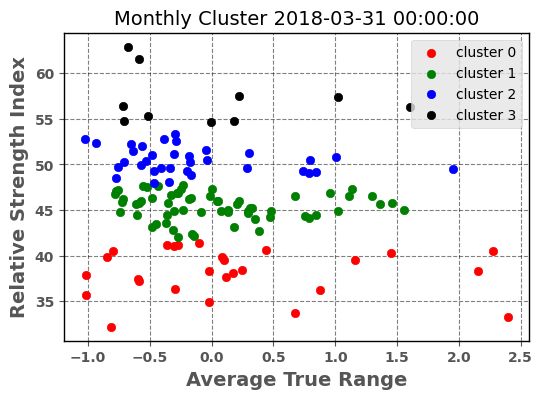

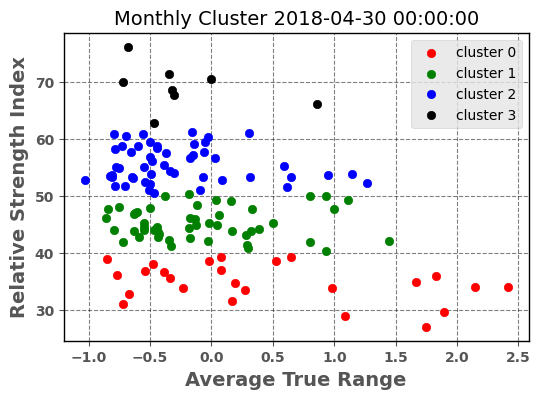

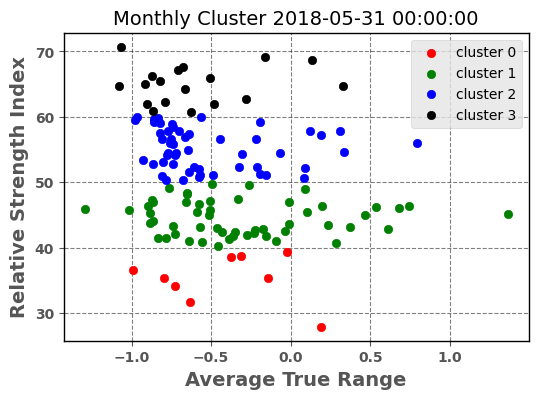

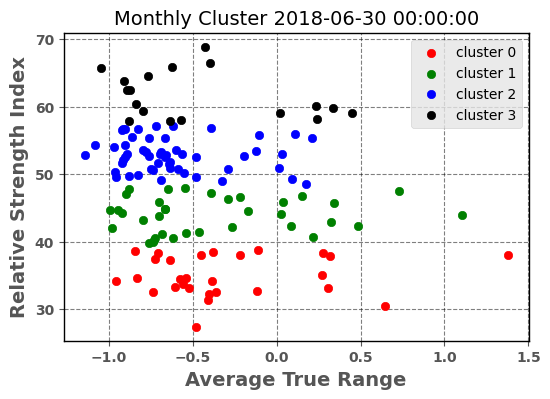

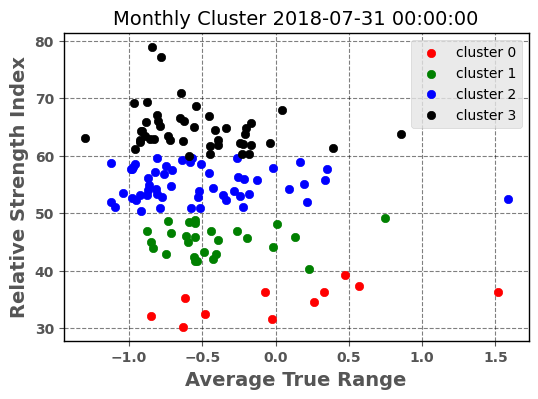

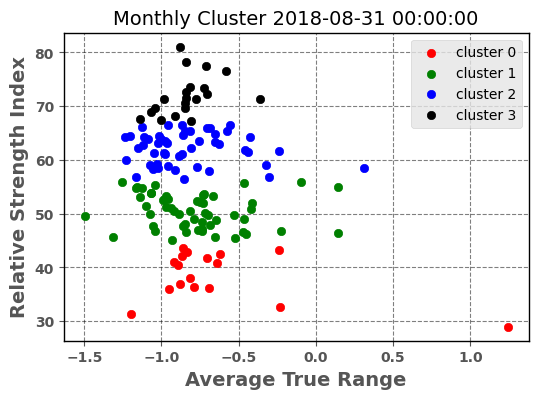

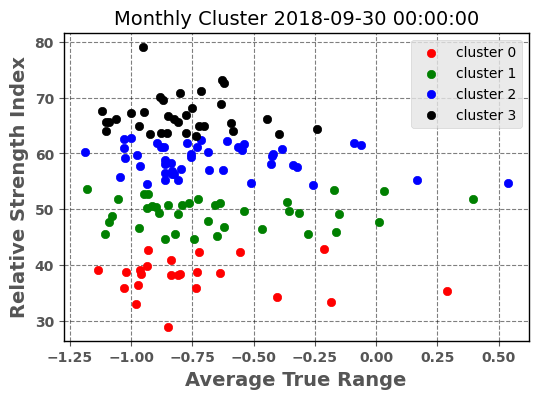

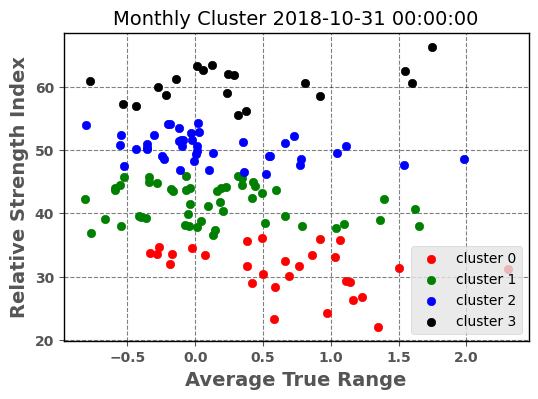

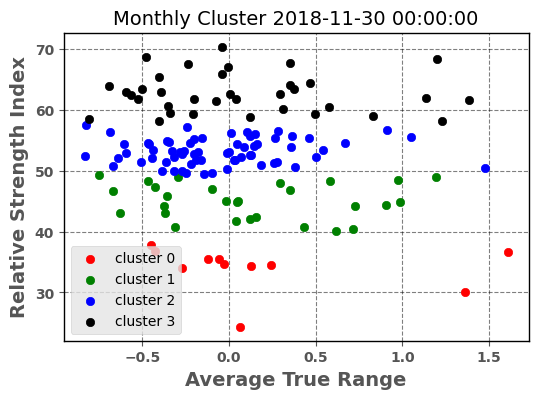

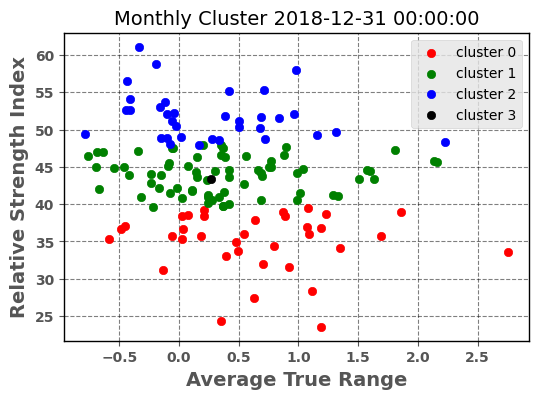

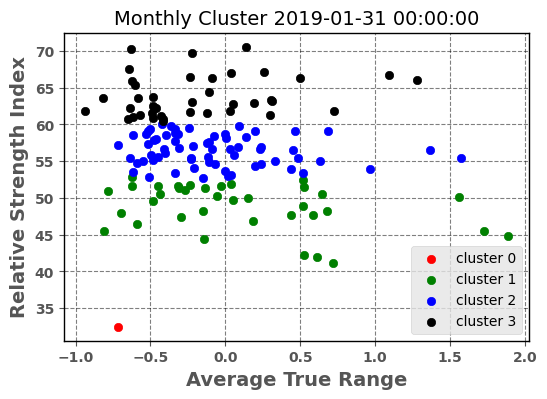

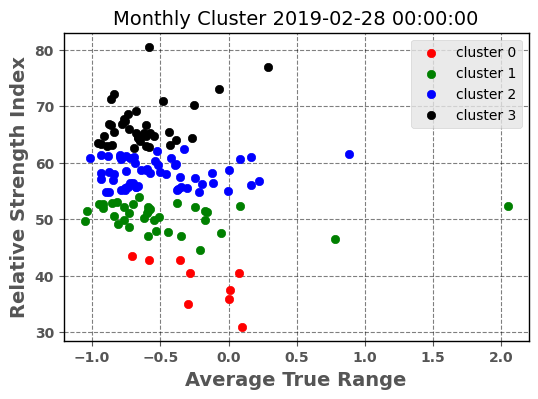

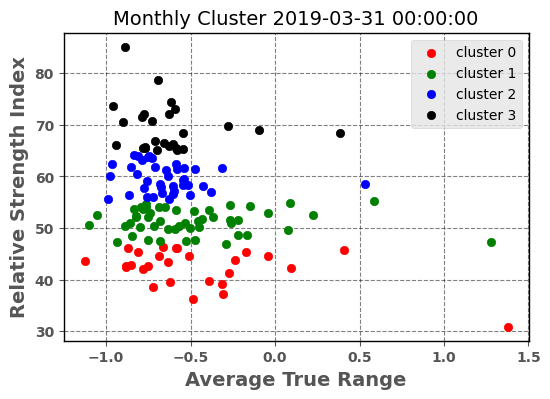

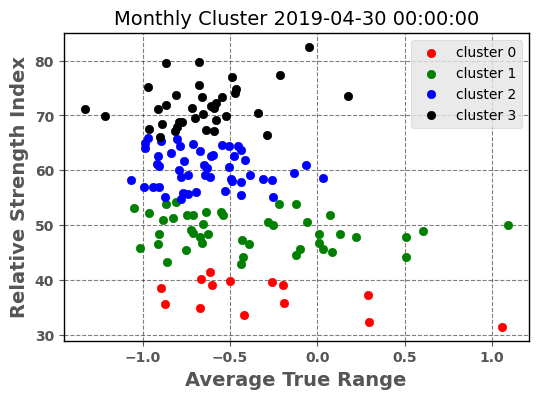

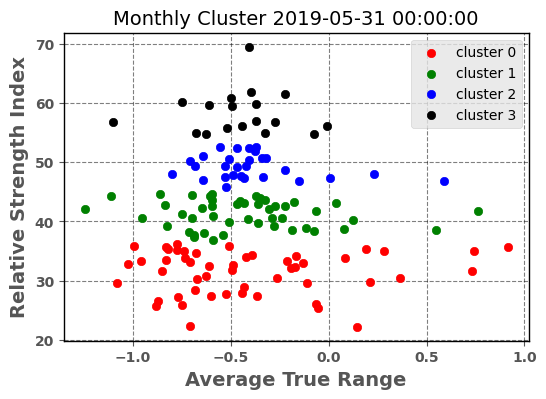

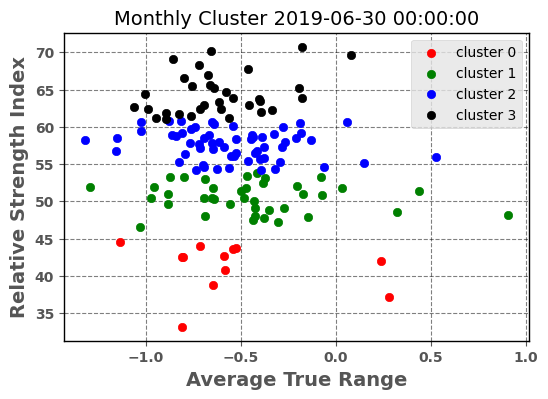

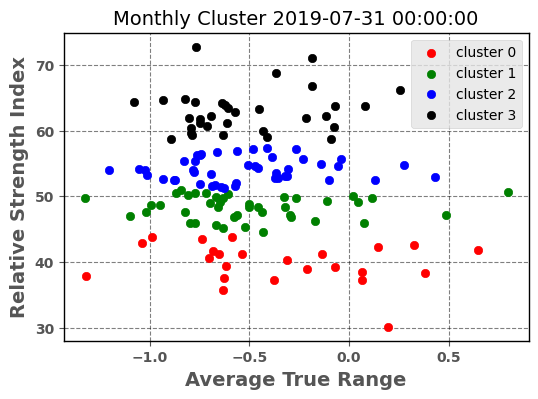

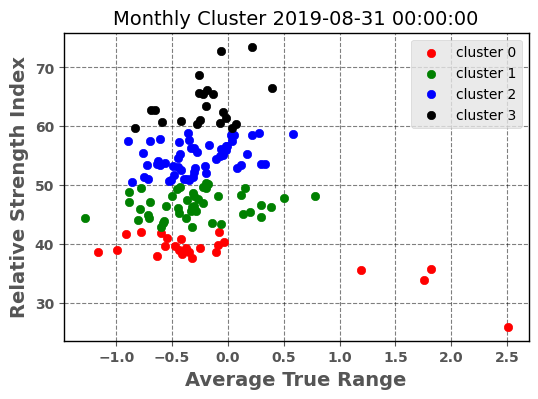

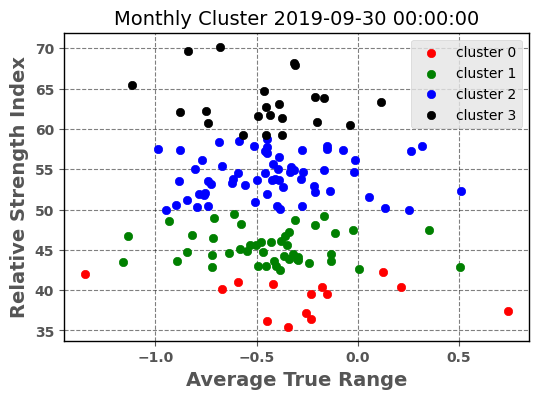

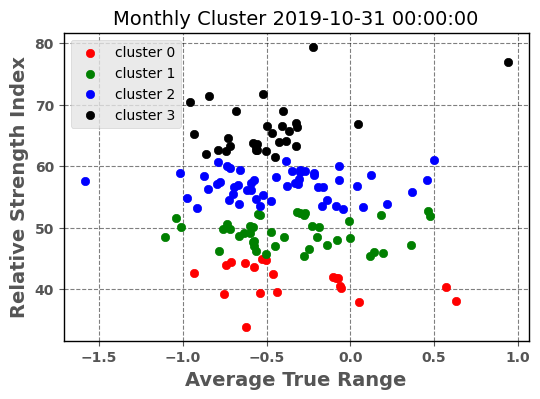

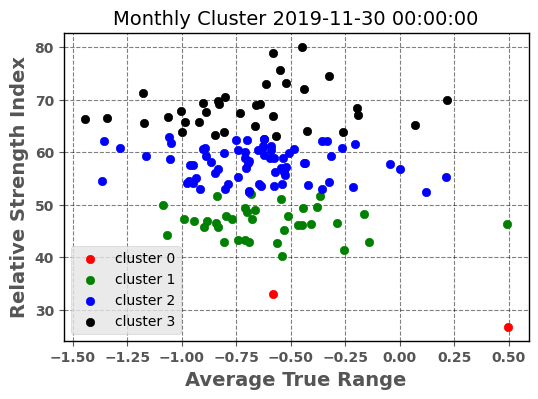

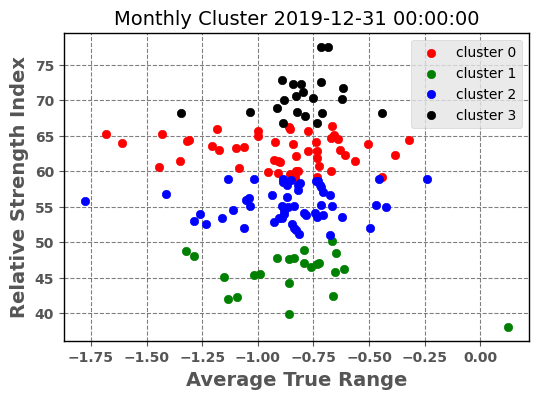

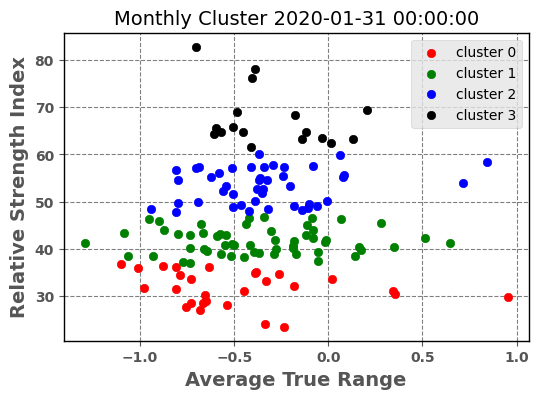

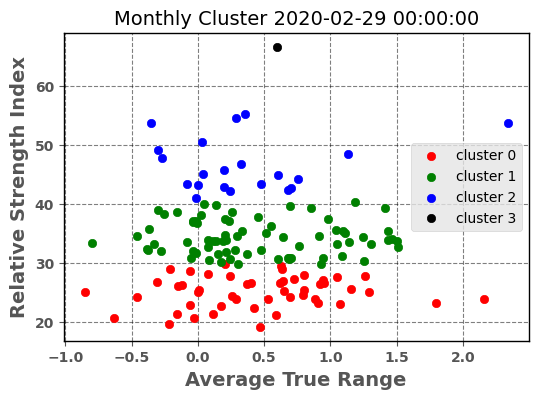

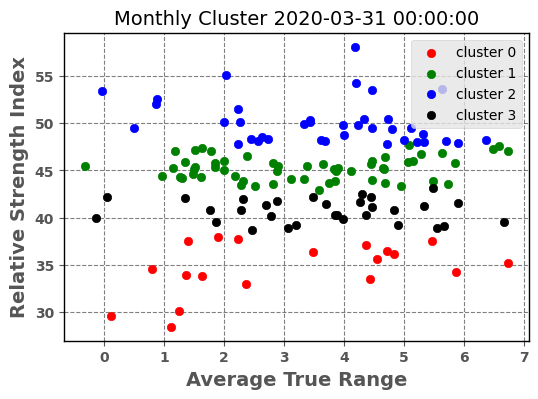

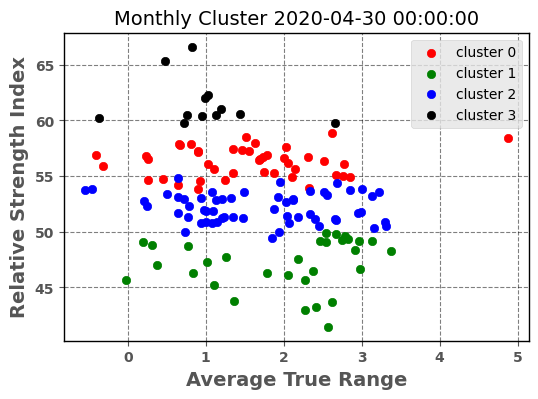

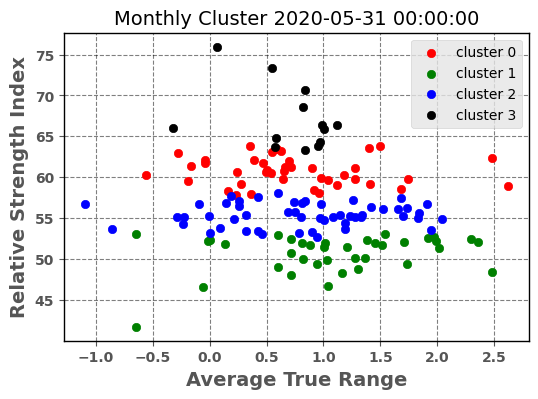

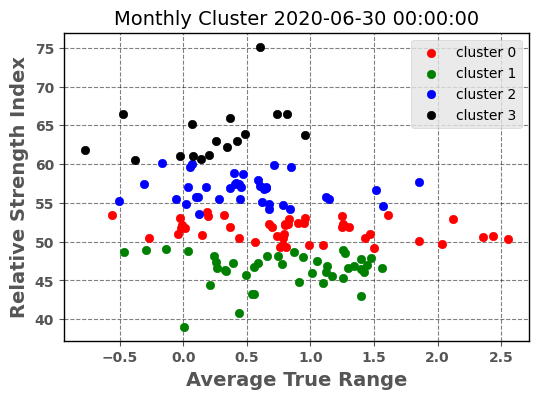

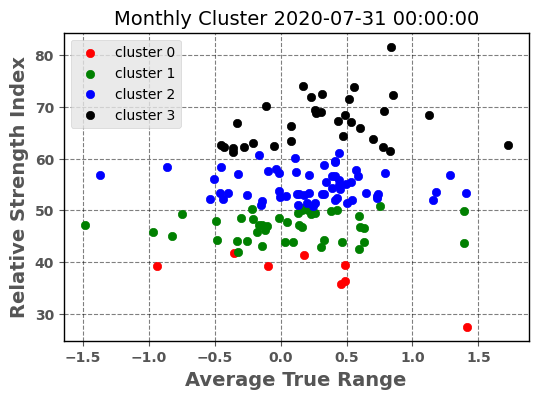

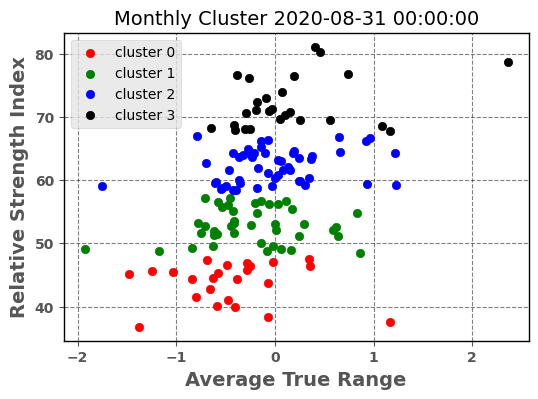

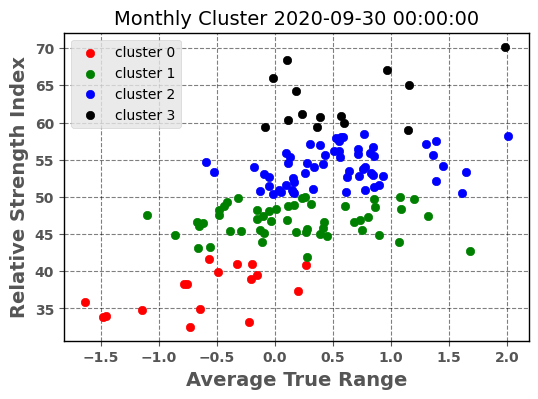

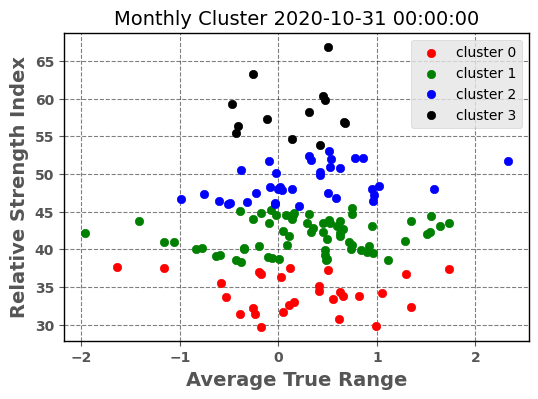

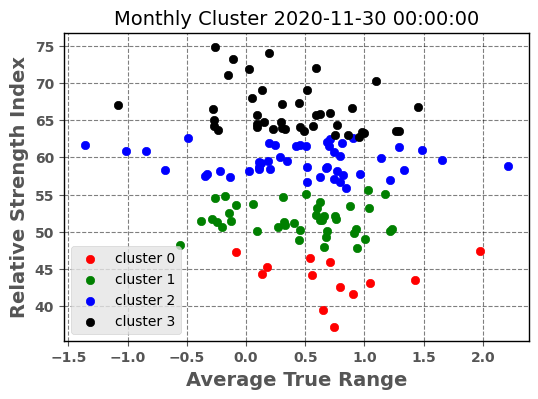

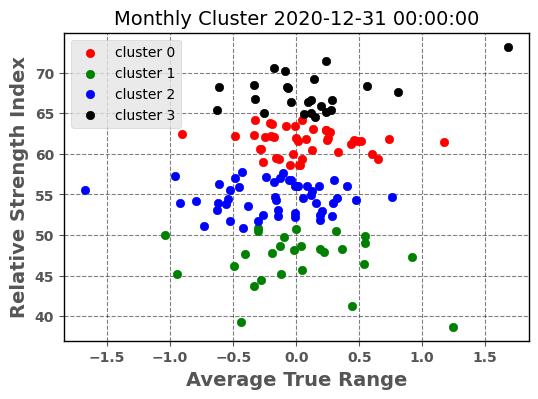

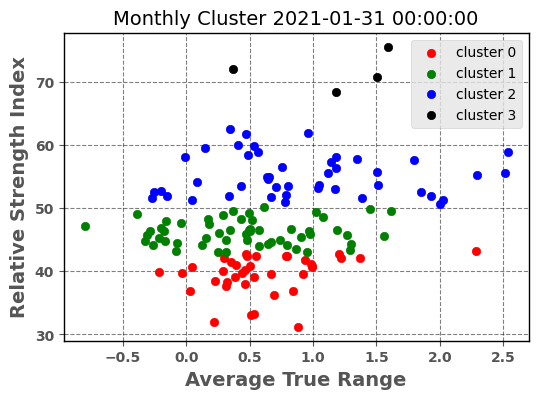

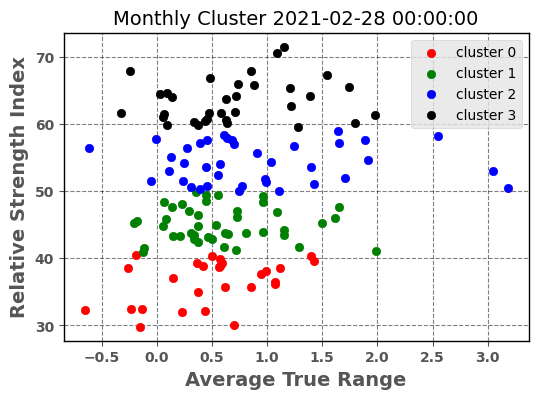

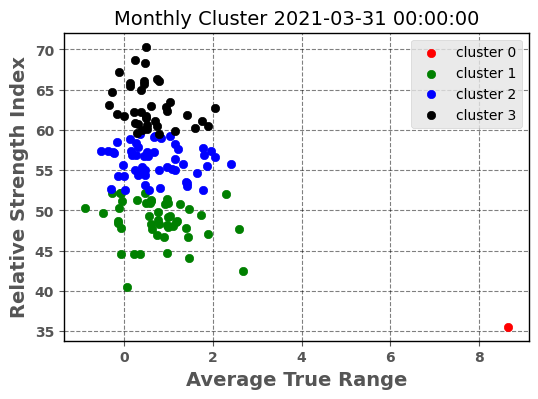

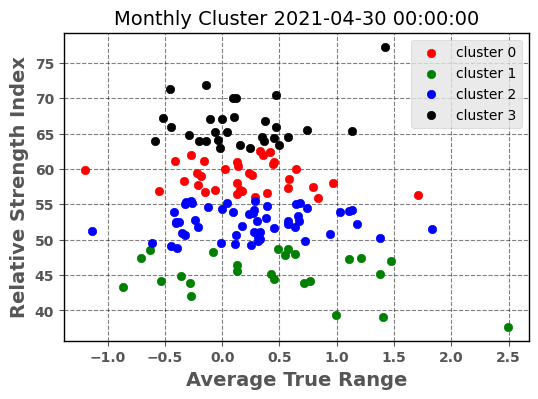

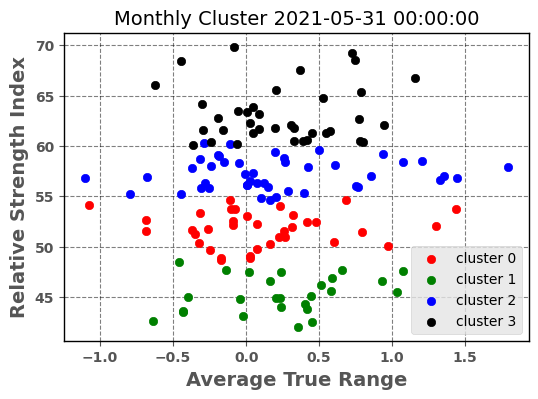

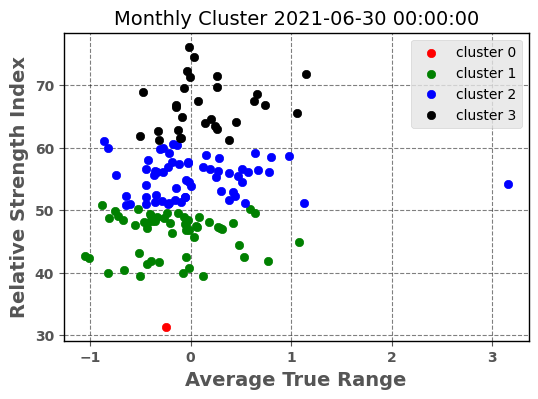

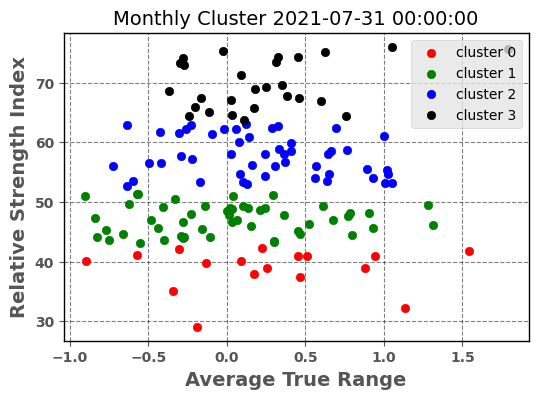

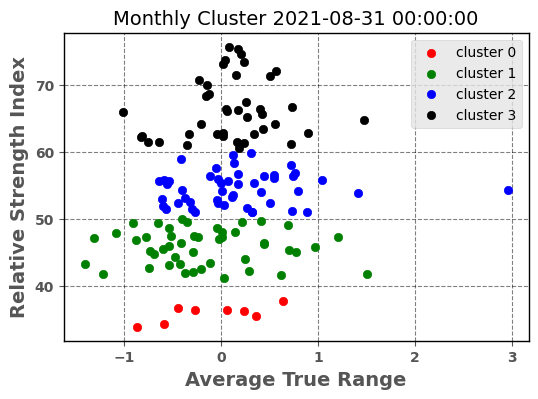

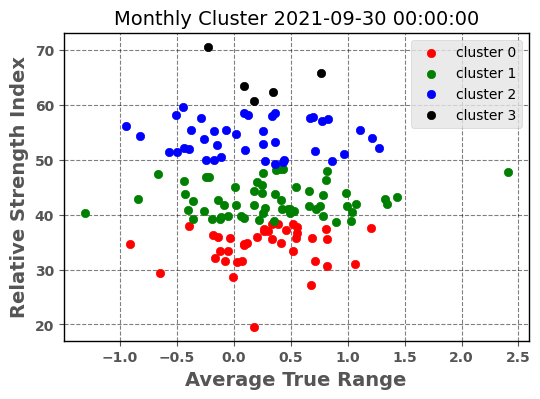

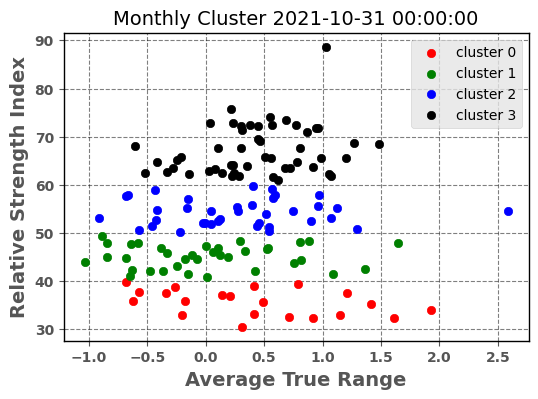

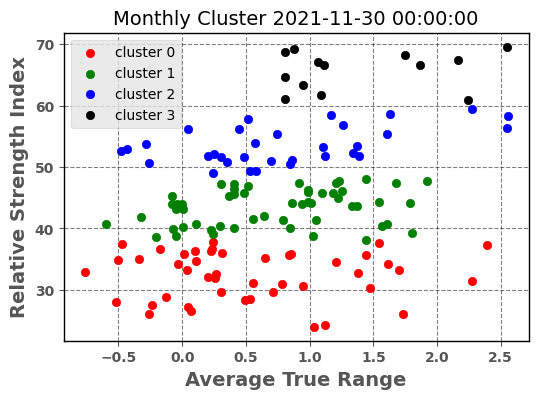

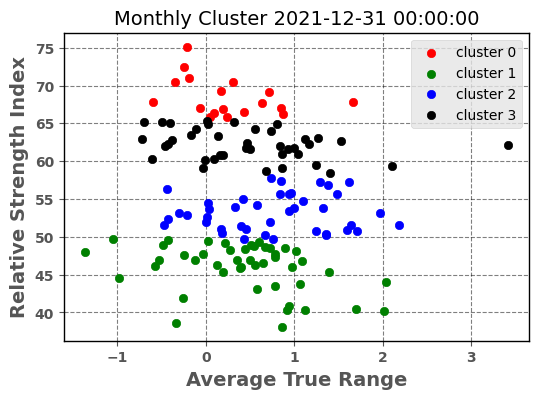

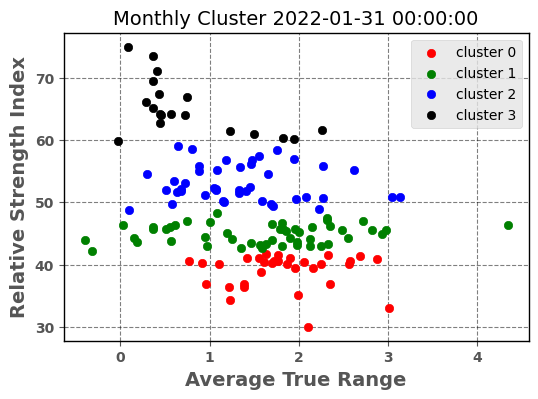

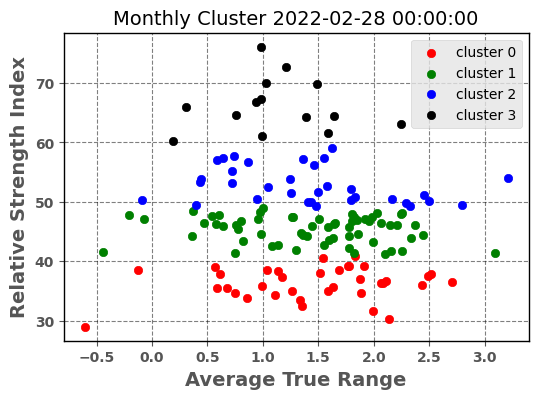

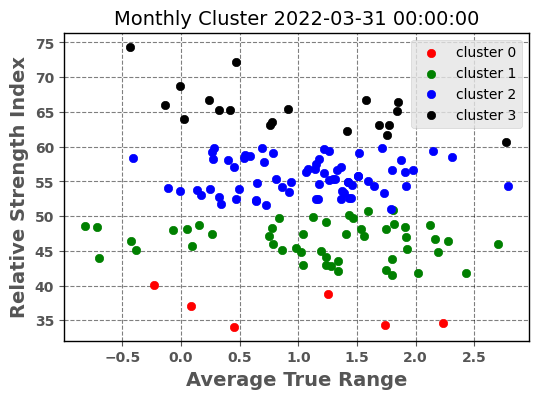

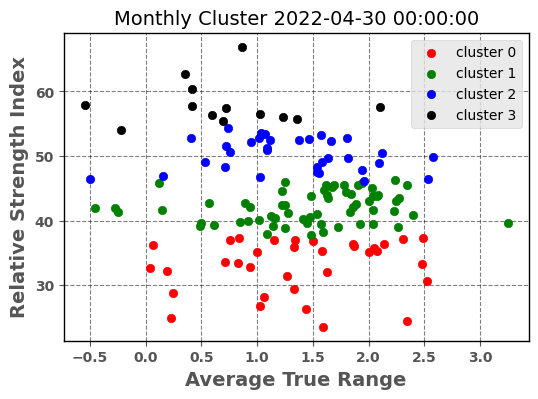

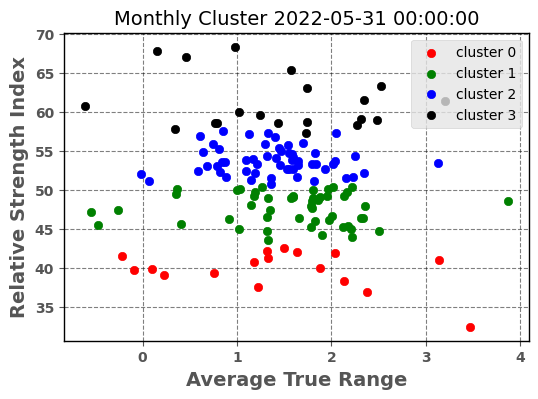

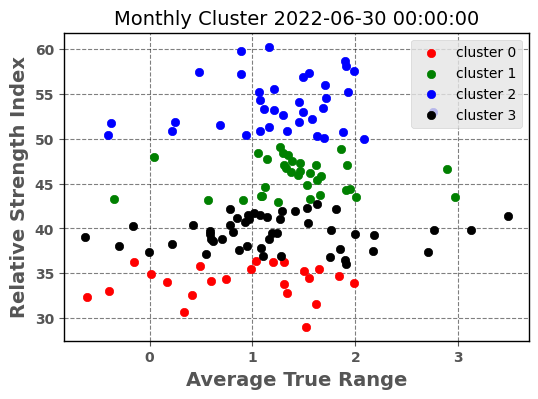

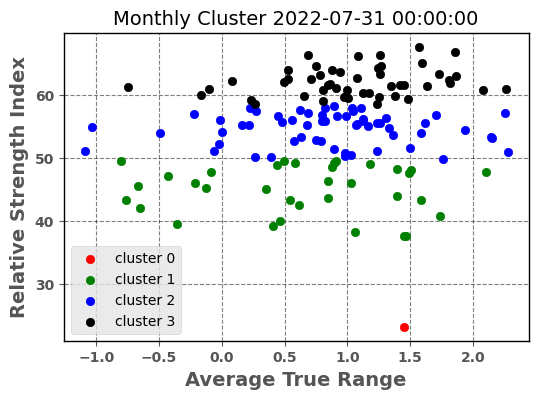

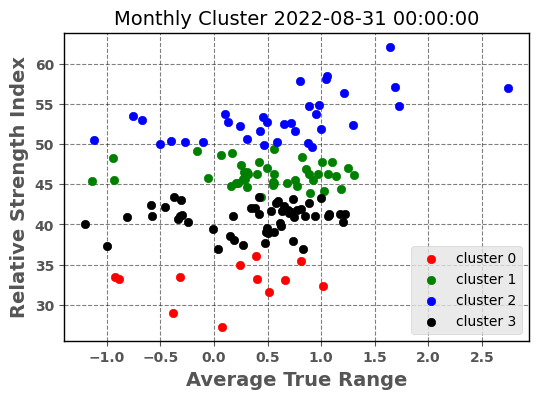

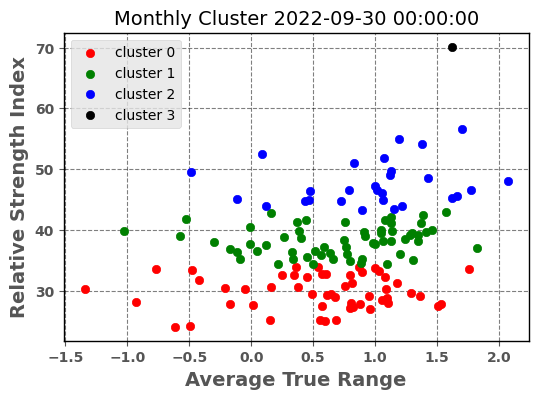

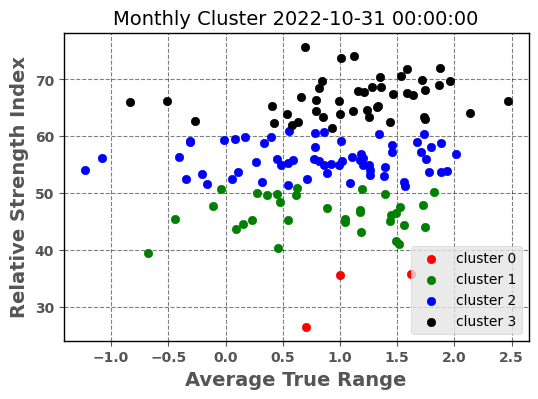

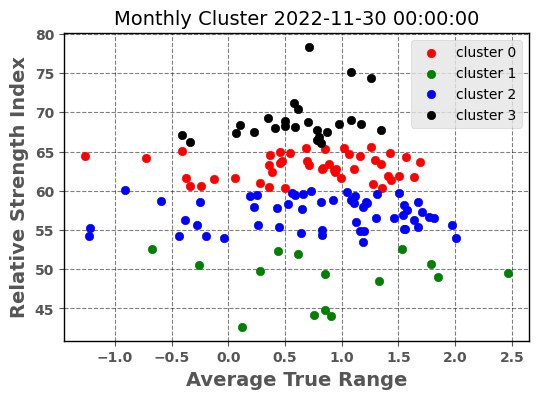

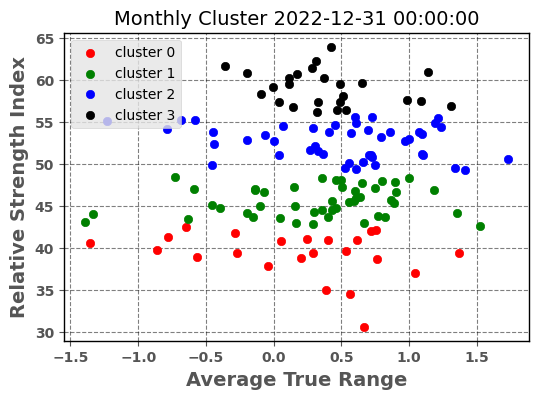

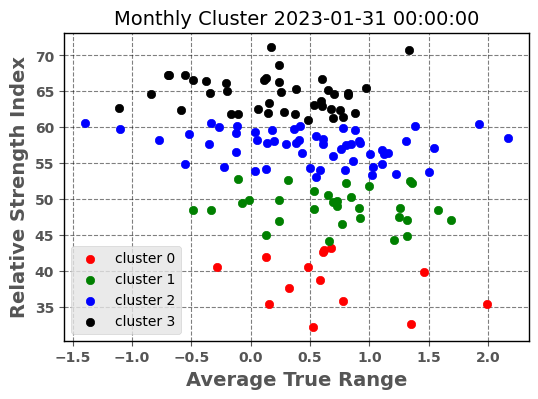

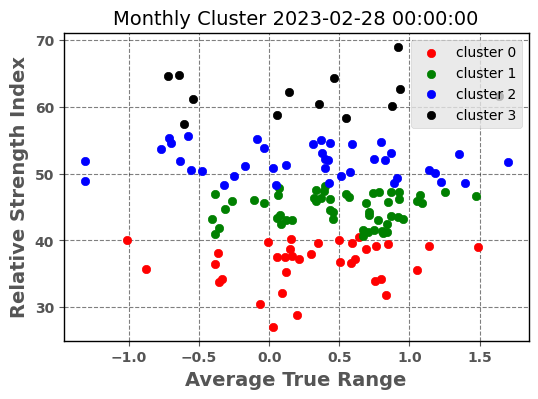

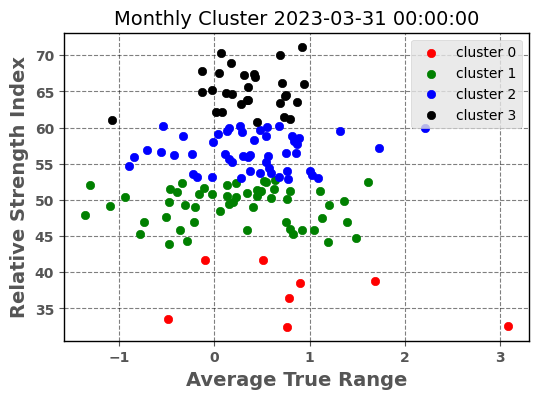

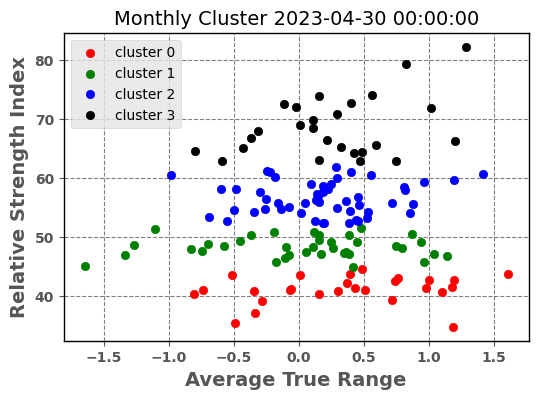

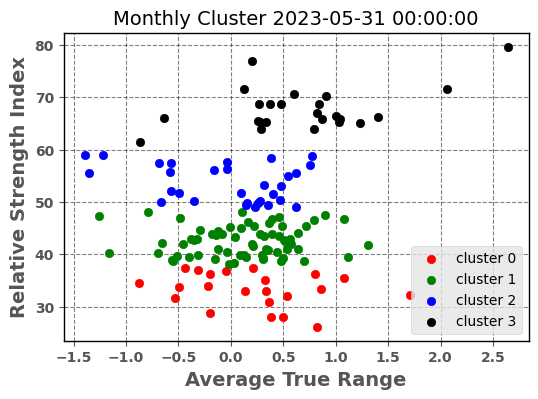

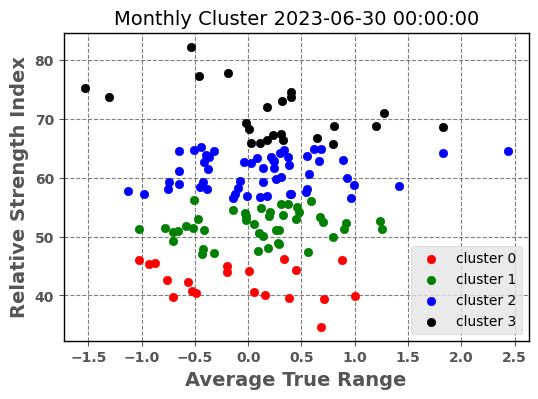

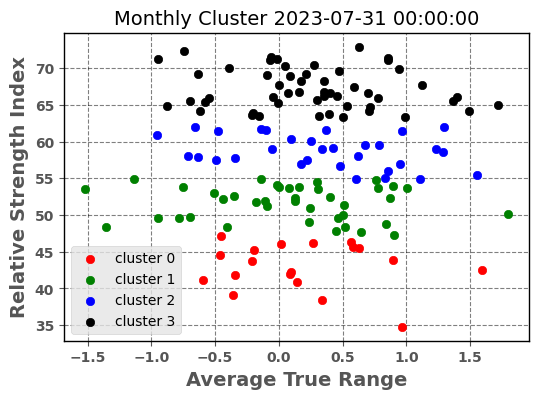

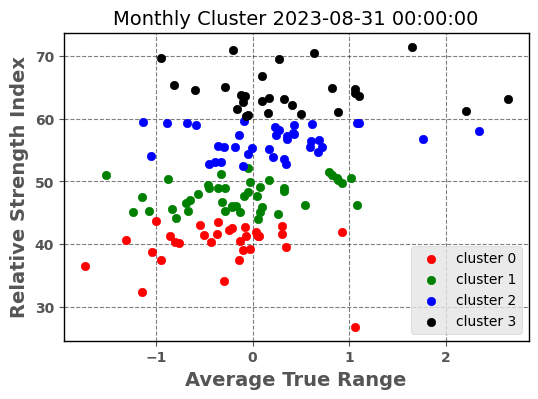

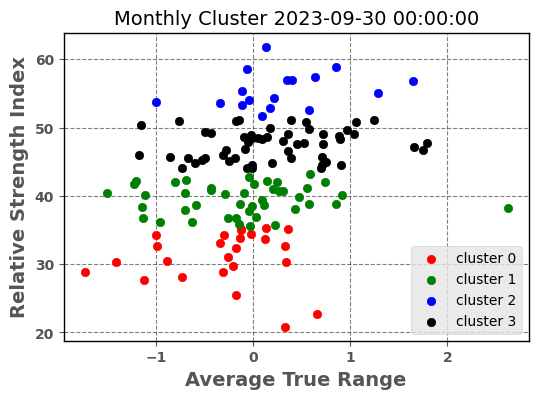

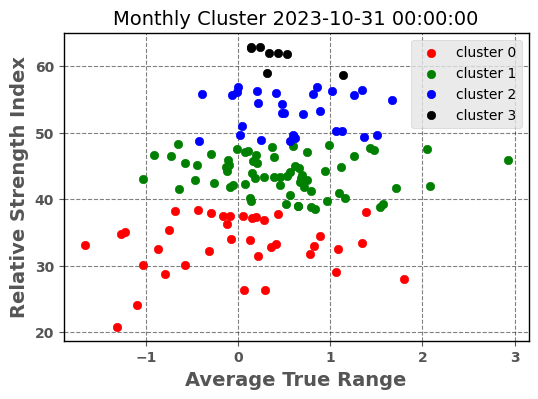

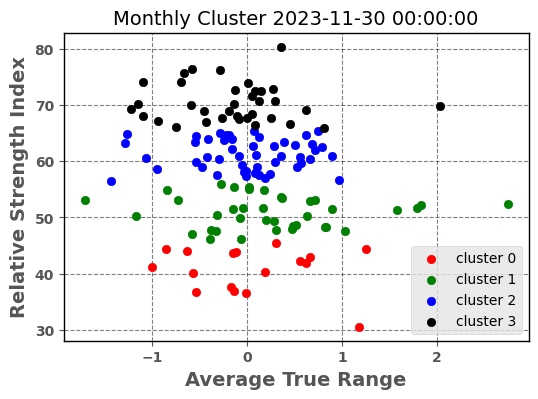

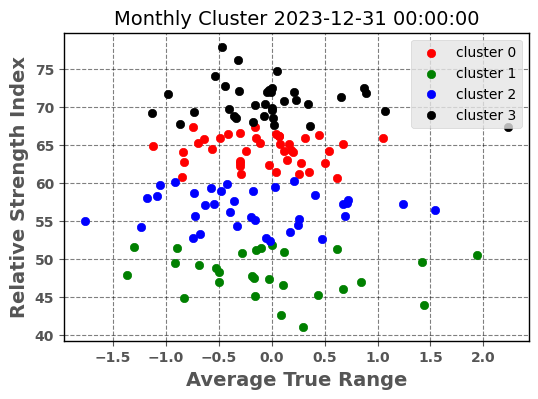

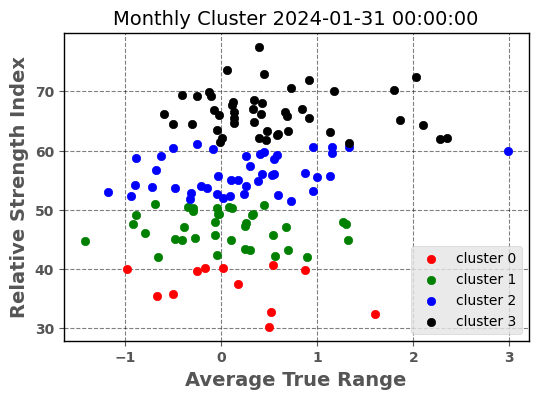

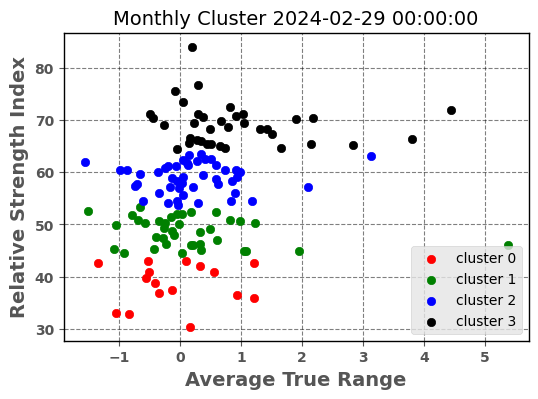

In [188]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i, level=0)
    
    # Create a new figure for each iteration
    plt.figure(figsize=(6, 4))
    
    # Set background color to white
    plt.gca().set_facecolor('white')
    plt.xlabel('Average True Range', fontsize=14, fontweight='bold')
    plt.ylabel('Relative Strength Index', fontsize=14, fontweight='bold')
    # Add grid lines in the background with a darker color
    plt.grid(True, linestyle='--', alpha=0.5, color='black')

    # Make axes ticks and title bold
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    # Make the axes lines more visible
    plt.gca().spines['top'].set_color('black')
    plt.gca().spines['right'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['left'].set_color('black')
    
    plt.title(f'Monthly Cluster {i}', fontsize=14)

    plot_clusters(g)

    plt.show()

### So the takeaway is that now we will have the ability to know which is the cluster of stocks which have the best momentum. which is cluster 3

# 7. For each month select assets based on the cluster and form a portfolio based on Efficient Frontier max sharpe ratio optimization

- First we will filter only stocks corresponding to the cluster we choose based on our hypothesis.

- Momentum is persistent and my idea would be that stocks clustered around RSI 70 centroid should continue to outperform in the following month - thus I would select stocks corresponding to cluster 3.

`filtered_df = data[data['cluster']==3].copy()`
- Explanation: This line creates a new DataFrame (filtered_df) containing only the rows from the original DataFrame data where the 'cluster' column has a value of 3.
- Purpose: The goal is to filter the data to only include rows where the 'cluster' is equal to 3.

`filtered_df = filtered_df.reset_index(level=1)`
- Explanation: This line resets the index of filtered_df by moving the second level of the multi-level index ('date') to become a regular column in the DataFrame.
- Purpose: The intention is to make 'date' a regular column so that it can be manipulated more easily.

`filtered_df.index = filtered_df.index + pd.DateOffset(1)`
- Explanation: This line adds a one-day offset to the 'date' index of filtered_df.
- Purpose: The aim is to shift all dates by one day.

`filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])`
- Explanation: This line resets the index to the default integer index and then sets a new multi-level index on the columns 'date' and 'ticker'.
- Purpose: The goal is to have 'date' and 'ticker' as the new multi-level index.

`dates = filtered_df.index.get_level_values('date').unique().tolist()`
- Explanation: This line extracts unique dates from the 'date' index level of filtered_df and converts them into a list.
- Purpose: To obtain a list of unique dates present in the DataFrame.

`fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()`
- Explanation: This loop iterates over the unique dates and creates a dictionary where each key is a formatted date string ('%Y-%m-%d') and the corresponding value is a list of tickers for that date.
- Purpose: To organize the data in a dictionary format for easier access and further processing.

In [189]:
filtered_df = data[data['cluster']==3].copy()

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index+pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'ticker'])

dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2018-04-01': ['AMT',
  'BKNG',
  'CL',
  'COP',
  'INTC',
  'NEE',
  'PANW',
  'STZ',
  'TJX',
  'WYNN'],
 '2018-05-01': ['CMG', 'COP', 'EOG', 'HAL', 'OXY', 'PXD', 'ULTA', 'VLO'],
 '2018-06-01': ['ADBE',
  'AMD',
  'AMZN',
  'BIIB',
  'CMG',
  'CSX',
  'EXPE',
  'GM',
  'LLY',
  'LOW',
  'META',
  'NEE',
  'NFLX',
  'OXY',
  'PANW',
  'TJX',
  'TXN',
  'VLO'],
 '2018-07-01': ['ACN',
  'AMT',
  'BSX',
  'COST',
  'CRM',
  'EA',
  'EOG',
  'KR',
  'MDLZ',
  'NEE',
  'NFLX',
  'NKE',
  'PEP',
  'PG',
  'REGN',
  'SHW',
  'TJX',
  'VZ'],
 '2018-08-01': ['ABT',
  'AMD',
  'AMGN',
  'AMT',
  'BMY',
  'C',
  'CL',
  'CMCSA',
  'COST',
  'CSX',
  'DIS',
  'ELV',
  'EOG',
  'EXPE',
  'GILD',
  'HON',
  'JNJ',
  'JPM',
  'KO',
  'KR',
  'LLY',
  'LMT',
  'LUV',
  'MDLZ',
  'MDT',
  'MMM',
  'MRK',
  'ORLY',
  'PEP',
  'PFE',
  'PG',
  'PM',
  'QCOM',
  'REGN',
  'RTX',
  'SHW',
  'TGT',
  'TJX',
  'TMO',
  'UAL',
  'UNP',
  'UPS',
  'USB',
  'VLO',
  'WMT'],
 '2018-09-01': ['AAPL',
  'ADP',
  

In [190]:
filtered_df

garman_klass_vol        rsi    bb_low    bb_mid   bb_high  \
date       ticker                                                              
2018-04-01 AMT            -0.006765  55.369469  4.787741  4.835212  4.882682   
           BKNG            0.000313  54.661218  7.614906  7.660081  7.705256   
           CL             -0.007161  54.779404  4.090664  4.117668  4.144673   
           COP            -0.013855  61.533987  3.769049  3.840049  3.911049   
           INTC           -0.004317  57.374518  3.760658  3.796911  3.833164   
...                             ...        ...       ...       ...       ...   
2024-03-01 SHW             0.000039  71.098624  5.702368  5.753071  5.803774   
           TGT             0.000054  64.367913  4.954941  4.999633  5.044326   
           UBER            0.000165  68.331143  4.196874  4.320959  4.445045   
           WFC             0.000056  73.417265  3.849400  3.950274  4.051148   
           WMT            -0.000004  64.642101  4.021267  4.063990  4.106714   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2018-04-01 AMT    -0.516068  0.187900   0.043135  -0.008021   0.006200   
           BKNG   -0.002551  0.578464   0.022787   0.043092   0.061826   
           CL      0.182294 -0.410646   0.039293  -0.017392  -0.015244   
           COP    -0.586221  0.335919   0.091696   0.006771   0.027874   
           INTC    1.022803  0.779322   0.056604   0.043640   0.043391   
...                     ...       ...        ...        ...        ...   
2024-03-01 SHW     0.293493  1.543248   0.093278   0.032918   0.060762   
           TGT    -0.057615  0.879935   0.107655   0.040038   0.048078   
           UBER    1.426879  2.513569   0.218018   0.136316   0.121366   
           WFC     0.043141  1.931379   0.115593   0.066467   0.078780   
           WMT     0.741943  2.311592   0.064024   0.056087   0.042671   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2018-04-01 AMT      0.011130   0.011594    0.016699  0.582705 -0.111115   
           BKNG     0.021527   0.011886    0.013081  1.254731 -0.085081   
           CL      -0.000922  -0.001931    0.000063  0.902318 -0.848752   
           COP      0.030475   0.035729    0.016416  1.412072  0.232007   
           INTC     0.055795   0.051767    0.033454  0.790049  0.396459   
...                      ...        ...         ...       ...       ...   
2024-03-01 SHW      0.034752   0.043542    0.035178  0.939053 -0.087506   
           TGT      0.035095   0.020368   -0.005323  0.891185  0.504197   
           UBER     0.090665   0.085699    0.075318  1.097076  1.085161   
           WFC      0.053597   0.040528    0.017164  1.065981 -0.078617   
           WMT      0.013739   0.021021    0.019174  0.597418 -0.419763   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2018-04-01 AMT    -0.426603  0.442727  0.469145        3  
           BKNG    0.592470  0.368406 -0.485567        3  
           CL     -0.256901  0.470632 -0.322948        3  
           COP     1.044293 -0.900112  0.603712        3  
           INTC   -0.319076  0.254047  0.793502        3  
...                     ...       ...       ...      ...  
2024-03-01 SHW     0.024056  0.899152 -0.145769        3  
           TGT    -0.578329  1.008012  0.476307        3  
           UBER   -0.298942 -1.399852 -0.374691        3  
           WFC     1.511249 -0.734053 -0.727279        3  
           WMT    -0.329581  0.298526  0.672027        3  

[1930 rows x 19 columns]

In [191]:
stocks = data.index.get_level_values('ticker').unique().tolist()

new_df = yf.download(tickers=stocks,
                     start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                     end=data.index.get_level_values('date').unique()[-1])

new_df

[                       0%%                      ]

[*********************100%%**********************]  158 of 158 completed


Adj Close                                                  \
                  AAL        AAPL        ABBV         ABT         ACN   
Date                                                                    
2017-03-31  40.966812   33.526379   47.930618   39.256153  107.226471   
2017-04-03  41.112087   33.535713   47.834972   39.309208  105.222878   
2017-04-04  39.610939   33.785400   47.893833   39.052853  105.580658   
2017-04-05  40.008022   33.610390   47.783493   38.716953  105.222878   
2017-04-06  40.405094   33.526379   47.871750   38.602043  104.480484   
...               ...         ...         ...         ...         ...   
2024-02-22  15.240000  184.369995  176.750000  119.019997  371.309998   
2024-02-23  15.130000  182.520004  178.089996  119.459999  377.320007   
2024-02-26  15.280000  181.160004  178.809998  118.690002  377.480011   
2024-02-27  15.540000  182.630005  178.990005  119.400002  377.910004   
2024-02-28  15.460000  181.419998  178.000000  120.050003  378.029999   

                                                                       ...  \
                  ADBE         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2017-03-31  130.130005   88.337257   86.470001  51.856312   35.871948  ...   
2017-04-03  129.589996   87.370964   85.389999  51.324711   35.862732  ...   
2017-04-04  130.039993   87.526260   84.949997  51.648655   35.964165  ...   
2017-04-05  129.889999   87.940384   83.540001  51.183502   35.392418  ...   
2017-04-06  130.149994   87.785118   84.070000  51.366238   35.576862  ...   
...                ...         ...         ...        ...         ...  ...   
2024-02-22  537.570007  253.296829  256.980011  70.543762  199.729996  ...   
2024-02-23  553.440002  254.400452  257.200012  70.981682  197.160004  ...   
2024-02-26  560.479980  252.093781  257.350006  70.981682  203.550003  ...   
2024-02-27  552.489990  249.866638  256.950012  71.608688  202.860001  ...   
2024-02-28  551.820007  250.115204  255.250000  72.086418  197.539993  ...   

             Volume                                                           \
                  V      VLO     VRTX        VZ       WBA      WDC       WFC   
Date                                                                           
2017-03-31  6429800  3622100  2849200  19299100   3133200  4155100  11864600   
2017-04-03  9125800  3319400  2040800  14307400   3283600  4051500  14550700   
2017-04-04  4859900  3101500  2913800   8952800   3273400  2902400  11937400   
2017-04-05  7251600  3236700  4032600  14327600  12117400  4093400  17411700   
2017-04-06  8473900  3378100  1959300  18456100   4696700  3160000  10387500   
...             ...      ...      ...       ...       ...      ...       ...   
2024-02-22  5100200  3467800  1091800  22068900  11972600  5101200  20467900   
2024-02-23  5107700  2520800   749700  15228600  31886700  3163600  20863500   
2024-02-26  3856900  3350600   788000  25108400  13650200  6165000  18099900   
2024-02-27  4145200  3047800   917400  17074100   9055000  6304300  19548200   
2024-02-28  4358800  3895200   786600  12437000   8841200  4133900  20045200   

                                         
                 WMT     WYNN       XOM  
Date                                     
2017-03-31  29819400  1979600  21750400  
2017-04-03  24873900  3477200  11438700  
2017-04-04  16701900  1668100   9270900  
2017-04-05  19063500  3103600  13809100  
2017-04-06  17823300  1953900   9554900  
...              ...      ...       ...  
2024-02-22  29512800  1020300  20470700  
2024-02-23  74365800  1515700  15975900  
2024-02-26  32154800  1176800  13360800  
2024-02-27  18012700  1536900  16360000  
2024-02-28  14803300  1327500  14810500  

[1739 rows x 948 columns]

## Define portfolio optimization function
- We will define a function which optimizes portfolio weights using PyPortfolioOpt package and EfficientFrontier optimizer to maximize the sharpe ratio.

- To optimize the weights of a given portfolio we would need to supply last 1 year prices to the function.

- Apply signal stock weight bounds constraint for diversification (minimum half of equaly weight and maximum 10% of portfolio)

- now we have the list of stocks we want to invest in at the beginning of each month.
- we need to assign weights to these stocks; that is what we will be doing
- so what this optimization function does is:
- we supply the prices/returns which we have already got ready in the df; which has the prices of all the stocks for one year.
- then it calculates the covariance
- and applies the efficient frontier model
- we opt for using the max_sharpe ratio and return rounded weights.
- the lower-bound part is needed to ensure a well balanced portfolio as we can customise the lower-bound figure. 

Expected Returns (`returns`):

The `expected_returns.mean_historical_return` function is used to calculate the expected returns of assets based on historical data.
Reasoning: MPT (Modern Portfolio Theory) assumes that historical returns are a reasonable estimate of future expected returns. It uses past performance to estimate the average return an investor can expect.

Covariance Matrix (`cov`):

The `risk_models.sample_cov` function estimates the covariance matrix of asset returns.
Reasoning: Covariance measures how two assets move in relation to each other. It is a crucial input for MPT, as it helps to understand the degree to which the returns of different assets move together.

EfficientFrontier (`ef`):

The `EfficientFrontier class` is instantiated with expected returns and the covariance matrix.
`weight_bounds` are set to ensure that weights are within a specified range during optimization (from lower_bound to 0.1).
The `SCS` solver is specified for optimization.
Reasoning: The Efficient Frontier represents a set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return.

Optimizing for Maximum Sharpe Ratio (`weights = ef.max_sharpe()`):

The `max_sharpe` method optimizes the portfolio for the maximum Sharpe ratio, which is a measure of risk-adjusted performance.
Reasoning: The Sharpe ratio considers both the return and the risk of an investment. Maximizing the Sharpe ratio aims to achieve the best trade-off between risk and return.

Cleaning Weights (`return ef.clean_weights()`):

The `clean_weights` method is applied to ensure that the optimized weights are sensible and sum to 1.
Reasoning: Portfolio weights should add up to 1, representing the entirety of the investment. Cleaning ensures that weights are feasible and interpretable.

In [192]:
#WORKS
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

class PID:
    def __init__(self, Kp, Ki, Kd, target):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.target = target
        self.prev_error = 0
        self.integral = 0

    def compute(self, current_value):
        error = self.target - current_value
        self.integral += error
        derivative = error - self.prev_error
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

def optimize_weights_pid(prices, lower_bound=0, pid_params=None):
    if pid_params is None:
        pid_params = {'Kp': 0.30, 'Ki': 0.3, 'Kd': 0.45, 'target': 1.2}

    returns = expected_returns.mean_historical_return(prices=prices, frequency=252)
    cov = risk_models.sample_cov(prices=prices, frequency=252)
    
    ef = EfficientFrontier(expected_returns=returns,
                           cov_matrix=cov,
                           weight_bounds=(lower_bound, .1),
                           solver='SCS')

    pid = PID(**pid_params)
    
    # Replace max_sharpe with PID
    weights = ef.clean_weights()
    target_return = ef.portfolio_performance()[0]

    while target_return < pid.target:
        weights = ef.clean_weights()
        target_return = ef.portfolio_performance()[0]

        # Use the PID controller to adjust weights
        pid_output = pid.compute(target_return)
        for asset in weights:
            weights[asset] += pid_output

    return weights

## What is the Risk Variable we use?

Ans: Points 1 and 3 very important. Reasoning behind Risk variable and Use of Effiecient Frontier Method
1. **Covariance as a Measure of Risk:**
In finance, risk is often associated with uncertainty and the variability of returns. The covariance between two assets measures how their returns move together. If two assets tend to move in the same direction (positive covariance), their returns are more correlated, and the portfolio may be riskier. Conversely, if they move in opposite directions (negative covariance), their returns may offset each other, potentially reducing overall portfolio risk.
Covariance is a key input in MPT and is used to quantify the degree to which the returns of different assets co-move.
Diversification and Risk Reduction:

2. MPT emphasizes diversification as a means of reducing portfolio risk. By holding assets with low or negative covariances, investors can potentially benefit from the fact that the returns of different assets do not perfectly align. This diversification effect can lead to a portfolio with a lower overall risk compared to individual assets.
Efficient Frontier and Risk-Return Tradeoff:

3. **The Efficient Frontier**, a fundamental concept in MPT, represents a set of optimal portfolios that offer the highest expected return for a given level of risk or the lowest risk for a given level of expected return. The risk component is typically captured through the standard deviation or volatility of the portfolio, which depends on the covariance matrix.
The optimization process aims to find the portfolio that maximizes return for a given level of risk or minimizes risk for a given level of return.
Sharpe Ratio and Risk-Adjusted Performance:

4. The Sharpe ratio, used in the optimization code, is a widely used measure of risk-adjusted performance. It considers both the expected return and the volatility (risk) of an investment. Portfolios with higher Sharpe ratios are considered more attractive because they offer better risk-adjusted returns

- Download Fresh Daily Prices Data only for short listed stocks.

- Since our optimisation starts from Nov 2017, we need to download from Nov 2016, so that the function gets its 1 year data to optimize


- Calculate daily returns for each stock which could land up in our portfolio. from the freshly downloaded data

- Then loop over each month start, select the stocks for the month and calculate their weights for the next month.

- If the maximum sharpe ratio optimization fails for a given month, apply equally-weighted weights.

- Calculated each day portfolio return.

`returns_dataframe = np.log(new_df['Adj Close']).diff()`
Explanation: This line calculates the log returns of the adjusted closing prices in new_df.
Purpose: Log returns are often used in finance because they provide a better representation of continuously compounded returns.

`portfolio_df = pd.DataFrame()`
Explanation: This line initializes an empty DataFrame called portfolio_df.
Purpose: This DataFrame will be used to store the results of the portfolio strategy.

`for start_date in fixed_dates.keys():`
Explanation: This starts a loop that iterates over the unique start dates in the fixed_dates dictionary.
Purpose: The loop goes through each date to perform portfolio optimization and strategy calculation.

`try:`
Explanation: The code inside the loop is placed inside a try-except block to handle potential errors during execution.
Purpose: It allows the code to continue running even if there are issues with specific iterations.

`end_date = (pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')`
Explanation: This line calculates the end date, which is the last day of the same month as the start_date.
Purpose: This is used to define the period for which returns and portfolio optimization will be calculated.

`cols = fixed_dates[start_date]`
Explanation: This line retrieves the list of tickers (stock symbols) associated with the start_date from the fixed_dates dictionary.
Purpose: These are the assets to be considered for portfolio optimization during this iteration.

`optimization_start_date = (pd.to_datetime(start_date) - pd.DateOffset(months=12)).strftime('%Y-%m-%d')
optimization_end_date = (pd.to_datetime(start_date) - pd.DateOffset(days=1)).strftime('%Y-%m-%d')`
Explanation: These lines determine the start and end dates for the historical data used in portfolio optimization, typically looking back 12 months.
Purpose: Historical data is used to estimate expected returns and the covariance matrix for the portfolio optimization.

`optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]`
Explanation: This line selects the historical stock prices for the tickers specified by cols during the optimization period.
Purpose: Historical prices are used to estimate expected returns and covariance matrix for portfolio optimization.

`        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                       lower_bound=round(1/(len(optimization_df.columns)*2), 3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
`
Explanation: This section attempts to optimize portfolio weights using the optimize_weights function. If it fails, it prints an error message and continues with equal weights.
Purpose: It aims to find optimal weights for the portfolio based on historical data, but it handles potential failures gracefully.

`        if success == False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                   index=optimization_df.columns.tolist(),
                                   columns=pd.Series(0)).T
`
Explanation: If the optimization fails, equal weights are assigned to each asset in the portfolio.
Purpose: This ensures that even if optimization fails, the strategy can continue with a straightforward approach.

`temp_df = returns_dataframe[start_date:end_date]`
Explanation: This line selects the log returns for the specific period defined by start_date and end_date.
Purpose: These returns will be used to calculate the portfolio strategy returns.

`        temp_df = temp_df.stack().to_frame('return').reset_index(level=0) \
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True) \
                   .reset_index().set_index(['Date', 'ticker']).unstack().stack()
`
Explanation: This section reshapes the DataFrame to combine returns and weights in a way that facilitates further calculations.
Purpose: It prepares the data for calculating the weighted returns for each asset in the portfolio.

`temp_df.index.names = ['date', 'ticker']`
Explanation: This line sets the index names for the reshaped DataFrame.
Purpose: It assigns meaningful names to the index levels.

`temp_df['weighted_return'] = temp_df['return']*temp_df['weight']`
Explanation: This line calculates the weighted return for each asset based on the log return and its weight.
Purpose: It quantifies the contribution of each asset to the overall portfolio return.

`temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')`
Explanation: This line calculates the total strategy return for each date by summing the weighted returns of all assets.
Purpose: It provides the overall return of the portfolio strategy for each date.

`portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)`
Explanation:This line concatenates the calculated strategy returns for each iteration into the `portfolio_df`.
Purpose:`portfolio_df` accumulates the results of each iteration.

`except Exception as e:
        print(e)`
Explanation: This block catches any exceptions that might occur during the loop and prints the error message.
Purpose: It helps in identifying and handling errors during the execution of the loop.

`portfolio_df = portfolio_df.drop_duplicates()`
Explanation: This line drops any duplicate rows in the resulting DataFrame.
Purpose: It ensures that the final portfolio_df only contains unique entries.

In [193]:
returns_dataframe = np.log(new_df['Adj Close']).diff()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    try:

        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')

        cols = fixed_dates[start_date]

        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')

        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        
        success = False
        try:
            weights = optimize_weights(prices=optimization_df,
                                   lower_bound=round(1/(len(optimization_df.columns)*2),3))

            weights = pd.DataFrame(weights, index=pd.Series(0))
            
            success = True
        except:
            print(f'Max Sharpe Optimization failed for {start_date}, Continuing with Equal-Weights')
        
        if success==False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                     index=optimization_df.columns.tolist(),
                                     columns=pd.Series(0)).T
        
        temp_df = returns_dataframe[start_date:end_date]

        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                   .merge(weights.stack().to_frame('weight').reset_index(level=0, drop=True),
                          left_index=True,
                          right_index=True)\
                   .reset_index().set_index(['Date', 'index']).unstack().stack()

        temp_df.index.names = ['date', 'ticker']

        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']

        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')

        portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()

portfolio_df

Max Sharpe Optimization failed for 2018-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-05-01, Continuing with Equal-Weights


Max Sharpe Optimization failed for 2018-06-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-07-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-08-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-09-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-10-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-11-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2018-12-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-01-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-02-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-03-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-04-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-05-01, Continuing with Equal-Weights
Max Sharpe Optimization failed for 2019-06-01, Continuing with Equal-Weights

Strategy Return
date                       
2018-04-02        -0.017145
2018-04-03         0.008727
2018-04-04         0.006975
2018-04-05         0.012537
2018-04-06        -0.016198
...                     ...
2024-02-22         0.018981
2024-02-23         0.005097
2024-02-26         0.001294
2024-02-27         0.000163
2024-02-28        -0.001814

[1488 rows x 1 columns]

# 8. Visualize Portfolio returns and compare to SP500 returns.

In [194]:
spy = yf.download(tickers='SPY',
                  start='2015-01-01',
                  end=dt.date.today())

spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'}, axis=1)

portfolio_df = portfolio_df.merge(spy_ret,
                                  left_index=True,
                                  right_index=True)

portfolio_df

[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold
2018-04-02        -0.017145     -0.021821
2018-04-03         0.008727      0.012736
2018-04-04         0.006975      0.010642
2018-04-05         0.012537      0.007861
2018-04-06        -0.016198     -0.022538
...                     ...           ...
2024-02-22         0.018981      0.020484
2024-02-23         0.005097      0.000689
2024-02-26         0.001294     -0.003669
2024-02-27         0.000163      0.001856
2024-02-28        -0.001814     -0.001323

[1488 rows x 2 columns]

In [195]:
portfolio_df.to_csv('Non_Cumulative_Returns.csv')

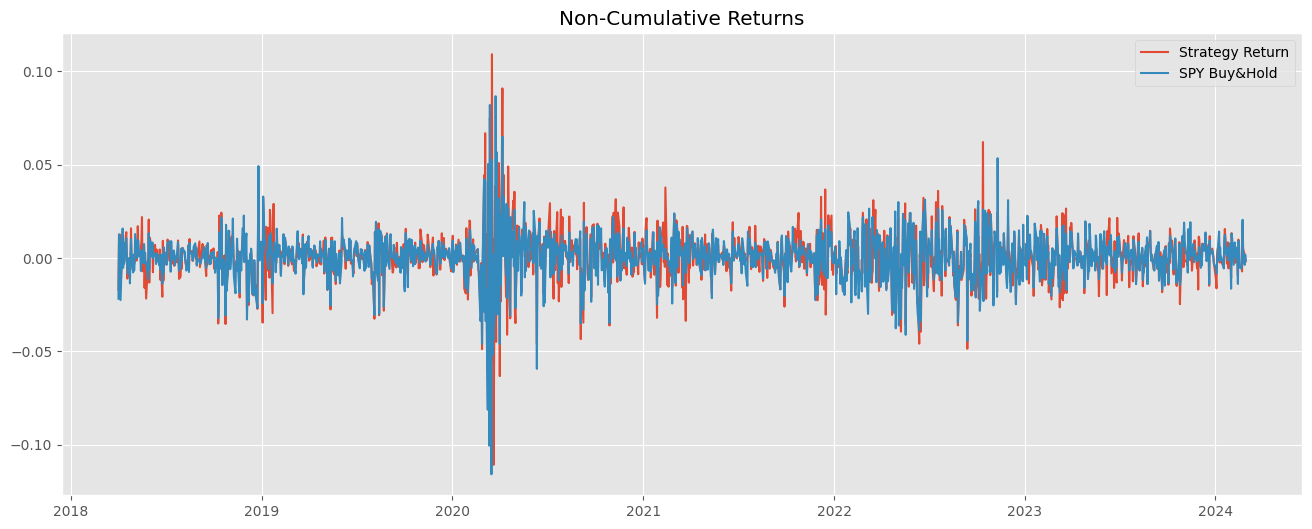

In [196]:
# Plotting non-cumulative returns
plt.figure(figsize=(16, 6))
plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return')
plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold')
plt.legend()
plt.title('Non-Cumulative Returns')
plt.show()

## Cumulative / Compounding returns

In [197]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cumulative_return

Strategy Return  SPY Buy&Hold
2018-04-02        -0.017145     -0.021821
2018-04-03        -0.008568     -0.009363
2018-04-04        -0.001653      0.001179
2018-04-05         0.010863      0.009050
2018-04-06        -0.005510     -0.013692
...                     ...           ...
2024-02-22         1.313807      0.878951
2024-02-23         1.325600      0.880246
2024-02-26         1.328609      0.873347
2024-02-27         1.328989      0.876824
2024-02-28         1.324763      0.874342

[1488 rows x 2 columns]

In [198]:
portfolio_cumulative_return.to_csv('Cumulative_Returns.csv')

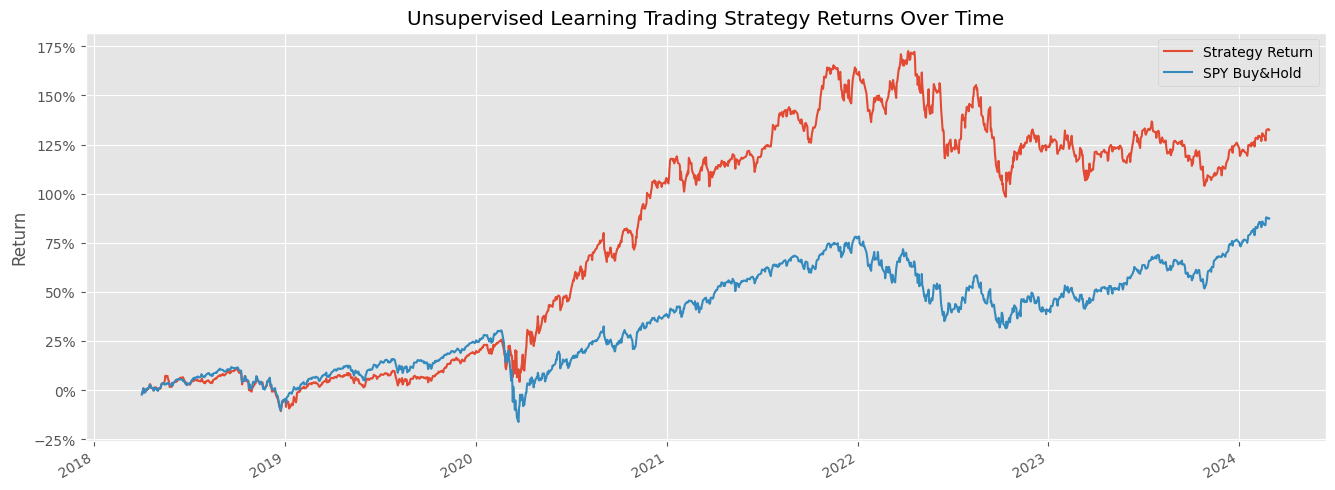

In [199]:
portfolio_cumulative_return[:'2024-02-29'].plot(figsize=(16,6))

plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()

## extra Benchmarks

In [200]:
import pandas as pd
import yfinance as yf

# Function to fetch index data
def get_index_data(ticker, start_date, end_date):
    index_data = yf.download(ticker, start=start_date, end=end_date)
    return index_data['Adj Close'].pct_change().dropna()

# Assuming your DataFrame is named 'df' with the date as the index
start_date = portfolio_df.index[0]
end_date = portfolio_df.index[-1]

# Get data for additional indices
djia_data = get_index_data('^DJI', start_date, end_date)  # Dow Jones Industrial Average
russell2000_data = get_index_data('^RUT', start_date, end_date)  # Russell 2000 Index
agg_bond_data = get_index_data('AGG', start_date, end_date)  # Barclays U.S. Aggregate Bond Index

# Merge data with the original DataFrame
portfolio_df = pd.concat([portfolio_df, djia_data, russell2000_data, agg_bond_data], axis=1)
portfolio_df.columns = ['Strategy Return', 'SPY Buy&Hold', 'DJIA', 'Russell 2000', 'Barclays U.S. Bond']

# Save the DataFrame to a CSV file
# df.to_csv('your_file_with_indices.csv')
portfolio_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold      DJIA  Russell 2000  \
2018-04-02        -0.017145     -0.021821       NaN           NaN   
2018-04-03         0.008727      0.012736  0.016459      0.013145   
2018-04-04         0.006975      0.010642  0.009609      0.012902   
2018-04-05         0.012537      0.007861  0.009929      0.007358   
2018-04-06        -0.016198     -0.022538 -0.023361     -0.019204   
...                     ...           ...       ...           ...   
2024-02-22         0.018981      0.020484  0.011832      0.009575   
2024-02-23         0.005097      0.000689  0.001598      0.001415   
2024-02-26         0.001294     -0.003669 -0.001592      0.006089   
2024-02-27         0.000163      0.001856 -0.002478      0.013376   
2024-02-28        -0.001814     -0.001323       NaN           NaN   

            Barclays U.S. Bond  
2018-04-02                 NaN  
2018-04-03           -0.001123  
2018-04-04            0.000375  
2018-04-05           -0.001404  
2018-04-06            0.002250  
...                        ...  
2024-02-22            0.000826  
2024-02-23            0.003712  
2024-02-26           -0.002157  
2024-02-27           -0.001338  
2024-02-28                 NaN  

[1488 rows x 5 columns]

## non cumulative

In [201]:
portfolio_df.to_csv('Non_cumulative_Returns_MultiBenchmarks.csv')

In [202]:
## ORIGINAL
# import matplotlib.pyplot as plt

# # Plotting non-cumulative returns
# plt.figure(figsize=(16, 6))
# plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return')
# plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold')
# plt.plot(portfolio_df.index, portfolio_df['DJIA'], label='DJIA')
# plt.plot(portfolio_df.index, portfolio_df['Russell 2000'], label='Russell 2000')
# # plt.plot(portfolio_df.index, portfolio_df['Barclays U.S. Bond'], label='Barclays U.S. Bond')
# plt.legend()
# plt.title('Non-Cumulative Returns')
# plt.show()

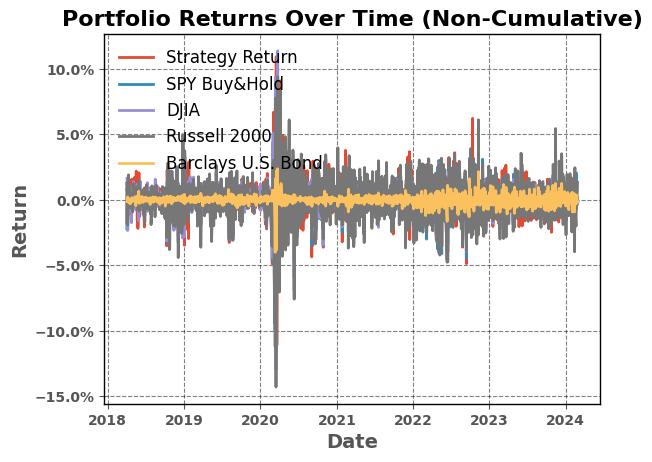

In [203]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

# Assuming 'portfolio_df' is already defined
plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return', linewidth=2)
plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold', linewidth=2)
plt.plot(portfolio_df.index, portfolio_df['DJIA'], label='DJIA', linewidth=2)
plt.plot(portfolio_df.index, portfolio_df['Russell 2000'], label='Russell 2000', linewidth=2)
plt.plot(portfolio_df.index, portfolio_df['Barclays U.S. Bond'], label='Barclays U.S. Bond', linewidth=2)

plt.title('Portfolio Returns Over Time (Non-Cumulative)', fontsize=16, fontweight='bold')

# Set background color to white
plt.gca().set_facecolor('white')

# Add x-y axis labels with bold font
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Return', fontsize=14, fontweight='bold')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Add grid lines in the background with a darker color
plt.grid(True, linestyle='--', alpha=0.5, color='black')

# Make axes ticks and title bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Customize the legend with different colors for each line
plt.legend(loc='upper left', fontsize='large', frameon=False)

# Make the axes lines more visible
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.show()

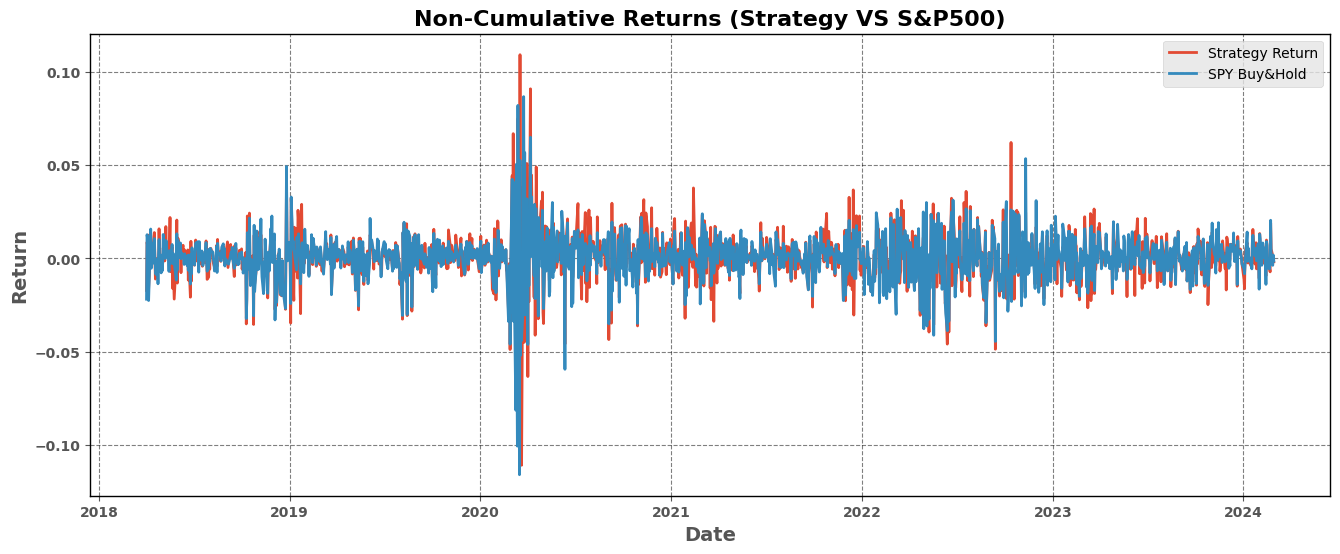

In [204]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

# Assuming 'portfolio_df' is already defined
plt.figure(figsize=(16, 6))

# Set background color to white
plt.gca().set_facecolor('white')

# Add grid lines in the background with a darker color
plt.grid(True, linestyle='--', alpha=0.5, color='black')

# Make axes ticks and title bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Make the axes lines more visible
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.plot(portfolio_df.index, portfolio_df['Strategy Return'], label='Strategy Return', linewidth=2)
plt.plot(portfolio_df.index, portfolio_df['SPY Buy&Hold'], label='SPY Buy&Hold', linewidth=2)

plt.legend()

plt.title('Non-Cumulative Returns (Strategy VS S&P500)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Return', fontsize=14, fontweight='bold')

plt.show()


## cumulative

In [205]:
import matplotlib.ticker as mtick

plt.style.use('ggplot')

portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1

portfolio_cumulative_return

Strategy Return  SPY Buy&Hold      DJIA  Russell 2000  \
2018-04-02        -0.017145     -0.021821       NaN           NaN   
2018-04-03        -0.008568     -0.009363  0.016459      0.013145   
2018-04-04        -0.001653      0.001179  0.026227      0.026217   
2018-04-05         0.010863      0.009050  0.036416      0.033768   
2018-04-06        -0.005510     -0.013692  0.012205      0.013916   
...                     ...           ...       ...           ...   
2024-02-22         1.313807      0.878951  0.652377      0.349279   
2024-02-23         1.325600      0.880246  0.655017      0.351189   
2024-02-26         1.328609      0.873347  0.652382      0.359417   
2024-02-27         1.328989      0.876824  0.648287      0.377600   
2024-02-28         1.324763      0.874342       NaN           NaN   

            Barclays U.S. Bond  
2018-04-02                 NaN  
2018-04-03           -0.001123  
2018-04-04           -0.000748  
2018-04-05           -0.002151  
2018-04-06            0.000094  
...                        ...  
2024-02-22            0.051210  
2024-02-23            0.055112  
2024-02-26            0.052836  
2024-02-27            0.051427  
2024-02-28                 NaN  

[1488 rows x 5 columns]

In [206]:
portfolio_cumulative_return.to_csv('Cumulative_Returns_MultiBenchmarks.csv')

In [207]:
# ORIGINAL
# portfolio_cumulative_return[:'2023-09-29'].plot(figsize=(16,6))

# plt.title('Unsupervised Learning Trading Strategy Returns Over Time')

# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# plt.ylabel('Return')

# plt.show()

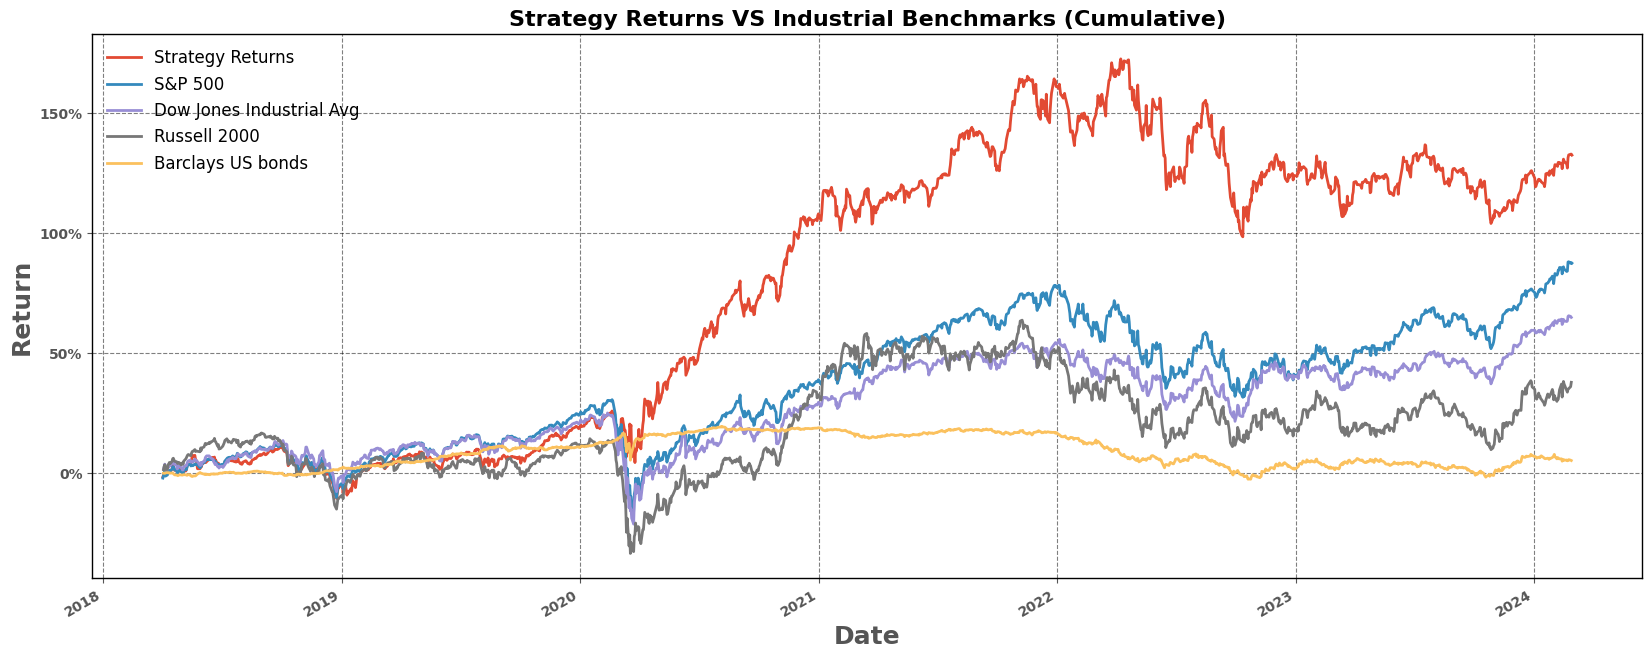

In [208]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('ggplot')

# Assuming 'portfolio_cumulative_return' is already defined
portfolio_cumulative_return[:'2024-02-29'].plot(figsize=(20, 8), linewidth=2)

plt.title('Strategy Returns VS Industrial Benchmarks (Cumulative)', fontsize=16, fontweight='bold')

# Set background color to white
plt.gca().set_facecolor('white')

# Add x-y axis labels with bold font
plt.xlabel('Date', fontsize=18, fontweight='bold')
plt.ylabel('Return', fontsize=18, fontweight='bold')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Add grid lines in the background with a darker color
plt.grid(True, linestyle='--', alpha=0.5, color='black')

# Make axes ticks and title bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Specify labels for each line in the legend
plt.legend(['Strategy Returns', 'S&P 500', 'Dow Jones Industrial Avg', 'Russell 2000', 'Barclays US bonds'], loc='upper left', fontsize='large', frameon=False)

# Make the axes lines more visible
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.show()

## End of Base